# Plots

This notebook contains code necessary to generate most of the plots for the Pan 3D Genome project. I have organized this largely by order of appearance in the manuscript; however, a few sections may be out of order. Use the Table of Contents below to navigate to specific plot.

## Table of Contents

- [Load Packages and Main Dataframe](#loaddataframe)
- [N Variants per Individual](#nvariantsperindividual)
- [Divergence Distribution](#divergencedistribution)
- [Example IDW Distribution](#exampleIDWdistribution)
- [Individually Driven Windows Sequence Divergence](#idwsequencedivergence)
- [Global 3D vs Sequence Divergence](#global3dvssequencedivergence)
- [Local 3D vs Sequence Divergence](#local3dvssequencedivergence)
- [Gene Expression](#geneepxression)

## Load Packages and Main Dataframe <a class = 'anchor' id = 'loaddataframe'></a>

Load all needed packages, change directories, set font, and load the main dataframe that we previously generated.

In [1]:
library(cowplot)
library(ggExtra)
library(ggplot2)
library(ggpubr)
library(reshape2)
library(showtext)
library(stringr)
options(scipen=999)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend


Loading required package: sysfonts

Loading required package: showtextdb



In [2]:
setwd('../../plots')

In [3]:
font_add('Arial', '~/fonts/arial.ttf')
showtext_auto()
showtext_opts(dpi = 300)

Colors.

In [4]:
ppn_pt_color = '#8c510a'
pt_pt_color = '#bf812d'
ppn_color = '#829a2d'
pte_color = '#d77d85'
pts_color = '#cfaf53'
ptt_color = '#d29063'
ptv_color = '#c38dad'
#pte_color = '#d2989d'

In [5]:
comparisons = read.csv('../data/dataframes/HFF_comparisons.txt', sep = '\t', header = TRUE)
head(comparisons)

ind1        ind2   dyad_type chr   window_start window        mse         
1 Akwaya-Jean Alfred pte-ptt   chr10 1572864      chr10_1572864 0.0001679965
2 Akwaya-Jean Alfred pte-ptt   chr10 2097152      chr10_2097152 0.0004808925
3 Akwaya-Jean Alfred pte-ptt   chr10 2621440      chr10_2621440 0.0016745600
4 Akwaya-Jean Alfred pte-ptt   chr10 3145728      chr10_3145728 0.0003225794
5 Akwaya-Jean Alfred pte-ptt   chr10 3670016      chr10_3670016 0.0001429828
6 Akwaya-Jean Alfred pte-ptt   chr10 4194304      chr10_4194304 0.0022898065
  spearman  divergence  seq_diff
1 0.9876550 0.012344984 2803    
2 0.9698092 0.030190797 2715    
3 0.9963985 0.003601548 2849    
4 0.9978993 0.002100716 2606    
5 0.9967316 0.003268396 2594    
6 0.9975879 0.002412069 2885

In [6]:
nrow(comparisons)

[1] 6669390

## N Variants per Individual <a class = 'anchor' id = 'nvariantsperindividual'></a>

In [7]:
n_variants = read.csv('../data/metadata/n_variants.txt', sep = '\t', header = FALSE)
colnames(n_variants) <- c('id','lineage','n_variants')
n_variants$lineage <- factor(n_variants$lineage , levels = c('ppn', 'ptt', 'pts', 'pte', 'ptv'))
n_variants <- n_variants[order(n_variants$lineage, -n_variants$n_variants),]
n_variants$id <- factor(n_variants$id, levels = n_variants$id)
head(n_variants)

id       lineage n_variants
44 Kumbuka  ppn     9393495   
40 Kombote  ppn     9214395   
12 Bono     ppn     9198721   
26 Desmond  ppn     9181795   
28 Dzeeta   ppn     9166793   
33 Hortense ppn     9164493

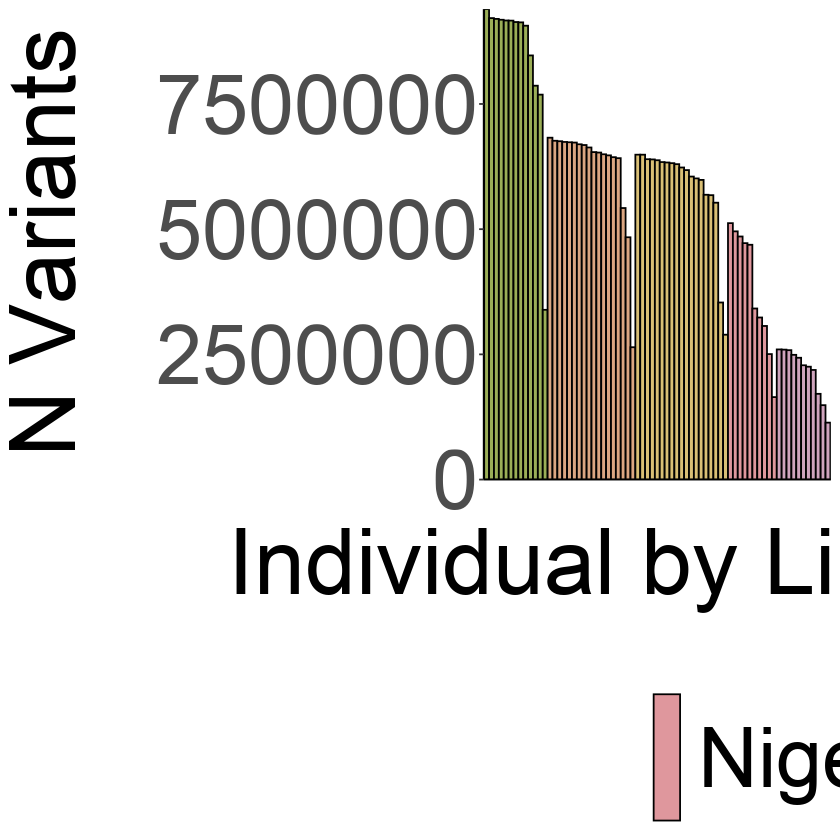

In [8]:
n_variants_plot <- ggplot(n_variants, aes(x = id, y = n_variants, fill = lineage)) + geom_bar(position = 'stack', stat = 'identity', color = 'black', alpha = 0.8, width = 1) +
xlab('\nIndividual by Lineage\n') + ylab('N Variants\n') +
scale_fill_manual(labels = c('Bonobo', 'Central Chimpanzee', 'Eastern Chimpanzee', 'Nigeria-Cameroon Chimpanzee', 'Western Chimpanzee'), name = '', values = c(ppn_color, ptt_color, pts_color, pte_color, ptv_color)) +
scale_y_continuous(expand = c(0, 0), limits = c(0, NA)) +
theme_classic() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.ticks.x = element_blank(), axis.text.x = element_blank(), axis.text.y = element_text(size = 20)) +
theme(legend.title = element_text(size = 20), legend.text = element_text(face = 'italic', size = 20)) +
theme(legend.position = 'bottom', legend.text = element_text(margin = margin(r = 3, unit = 'cm')))

n_variants_plot

In [9]:
pdf('suppl_figs/n_variants_plot.pdf', height = 10, width = 24)
n_variants_plot
dev.off()

png 
  2

## Contact Values Distribution

In [10]:
random_contacts = read.csv('../data/predictions/HFF/random.txt', sep = '\t', header = FALSE)
head(random_contacts)

V1         
1 -0.07969698
2 -0.08148655
3  0.12285706
4 -0.47345644
5 -0.15916070
6  0.16127333

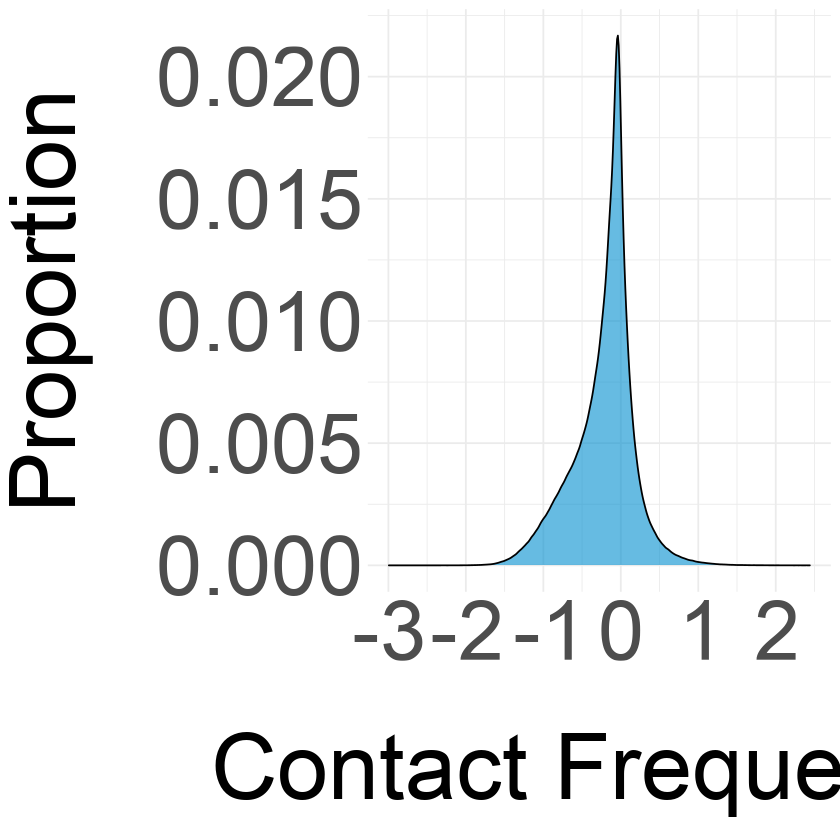

In [11]:
contact_values_distribution_plot <- ggplot(random_contacts, aes(V1, ..count../sum(..count..))) + geom_density(fill = '#008ECE', alpha = 0.6) + 
xlab('\nContact Frequency') + ylab('Proportion\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

contact_values_distribution_plot

In [12]:
pdf('suppl_figs/contact_values_distribution_plot.pdf', height = 8, width = 12)
contact_values_distribution_plot
dev.off()

png 
  2

## Divergence Distribution <a class = 'anchor' id = 'divergencedistribution'></a>

Examine the overall distribution of divergence among all window pairs.

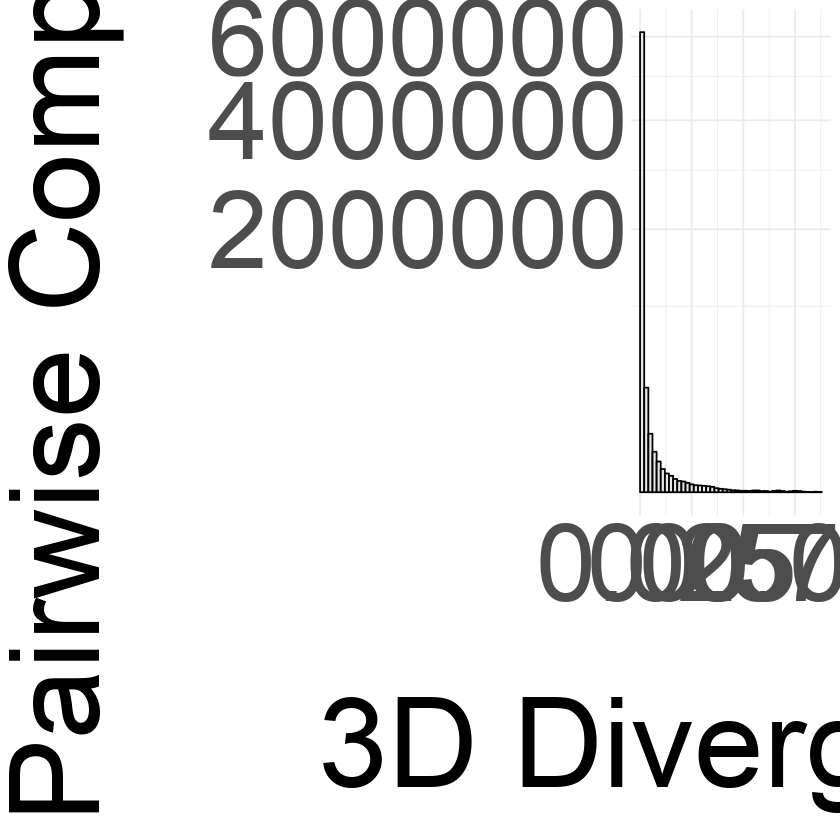

In [13]:
window_histogram <- ggplot(comparisons, aes(x = divergence)) + geom_histogram(binwidth = 0.02, center = 0.01, color = 'black', fill = 'grey85', alpha = 0.6) +
xlab('\n3D Divergence') + ylab('N Pairwise Comparisons\n') + coord_trans(y = 'sqrt') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 30), axis.text.x = element_text(size = 26), axis.text.y = element_text(size = 26))

window_histogram

In [14]:
pdf('main_figs/window_histogram.pdf', height = 12, width = 15)
window_histogram
dev.off()

png 
  2

In [15]:
high_divergence_comparisons <- subset(comparisons, divergence >= 0.3)
head(high_divergence_comparisons)

ind1        ind2      dyad_type chr   window_start window        
3488  Akwaya-Jean Alfred    pte-ptt   chr6   90177536    chr6_90177536 
6331  Akwaya-Jean Alice     pte-ptv   chr2A  22020096    chr2A_22020096
7143  Akwaya-Jean Alice     pte-ptv   chr4   68681728    chr4_68681728 
8038  Akwaya-Jean Alice     pte-ptv   chr7  105906176    chr7_105906176
11412 Akwaya-Jean Andromeda pte-pts   chr4   68681728    chr4_68681728 
11633 Akwaya-Jean Andromeda pte-pts   chr5   11534336    chr5_11534336 
      mse         spearman  divergence seq_diff
3488  0.008007103 0.6913133 0.3086867  2276    
6331  0.014963722 0.6577698 0.3422302  2240    
7143  0.005220717 0.6775230 0.3224770  2325    
8038  0.014150720 0.6308003 0.3691997  2505    
11412 0.005002019 0.6933034 0.3066966  3148    
11633 0.007324223 0.6961951 0.3038049  2360

In [16]:
#high_divergence_IDWs_dist = read.csv('../data/dataframes/high_divergence_IDWs_dist.txt', sep = '\t', header = TRUE)
#head(high_divergence_IDWs_dist)

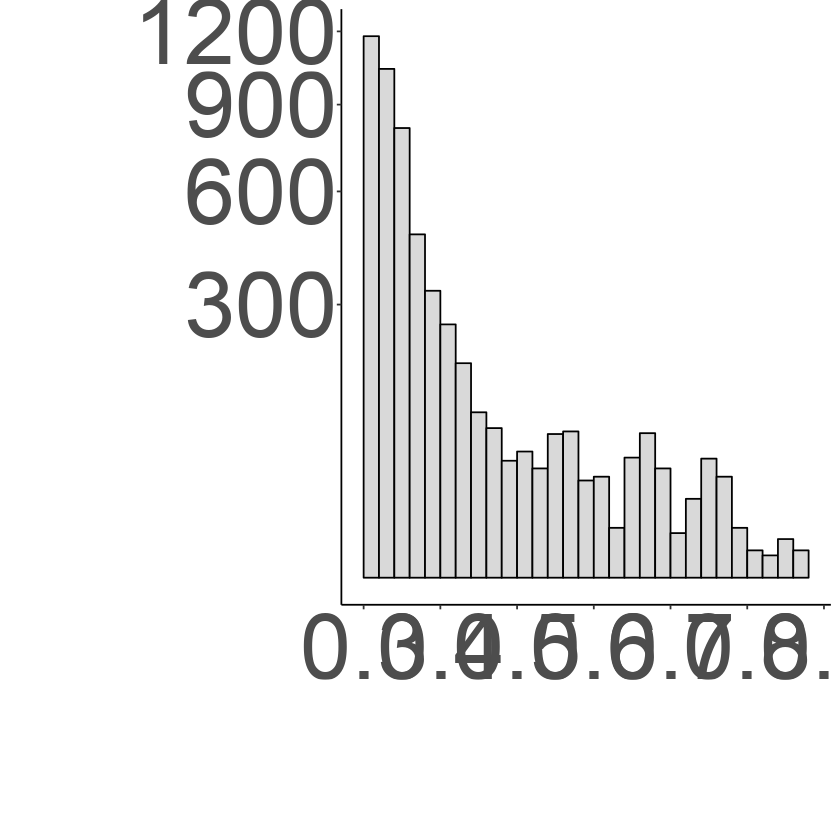

In [17]:
window_histogram_inset <- ggplot(high_divergence_comparisons, aes(x = divergence)) + geom_histogram(binwidth = 0.02, center = 0.01, color = 'black', fill = 'grey85', position = 'identity') +
#coord_cartesian(xlim = c(0.3,0.9)) +
xlab('') + ylab('') + scale_y_continuous(breaks = c(0,300,600,900,1200)) + coord_trans(y = 'sqrt') +
#scale_fill_manual(labels = c('All Windows', 'IDWs'), name = 'Window Type   ', values = c('grey85', '#e18942')) +
theme_classic() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 26), axis.text.x = element_text(size = 22), axis.text.y = element_text(size = 22)) +
theme(legend.title = element_text(size = 18), legend.text = element_text(size = 18)) +
theme(legend.position = 'bottom', legend.text = element_text(margin = margin(r = 0.5, unit = 'cm')))

window_histogram_inset

In [18]:
pdf('main_figs/window_histogram_inset.pdf', height = 8, width = 10)
window_histogram_inset
dev.off()

png 
  2

## Genome-Wide Average per Dyad Type

Boxplots.

In [19]:
comparisons_simple = comparisons
comparisons_simple$dyad_type <- str_replace_all(comparisons_simple$dyad_type, c('pte-pts'='pt-pt', 'pte-ptt'='pt-pt', 'pte-ptv'='pt-pt', 'pts-ptt'='pt-pt', 'pts-ptv'='pt-pt', 'ptt-ptv'='pt-pt'))
head(comparisons_simple)

ind1        ind2   dyad_type chr   window_start window        mse         
1 Akwaya-Jean Alfred pt-pt     chr10 1572864      chr10_1572864 0.0001679965
2 Akwaya-Jean Alfred pt-pt     chr10 2097152      chr10_2097152 0.0004808925
3 Akwaya-Jean Alfred pt-pt     chr10 2621440      chr10_2621440 0.0016745600
4 Akwaya-Jean Alfred pt-pt     chr10 3145728      chr10_3145728 0.0003225794
5 Akwaya-Jean Alfred pt-pt     chr10 3670016      chr10_3670016 0.0001429828
6 Akwaya-Jean Alfred pt-pt     chr10 4194304      chr10_4194304 0.0022898065
  spearman  divergence  seq_diff
1 0.9876550 0.012344984 2803    
2 0.9698092 0.030190797 2715    
3 0.9963985 0.003601548 2849    
4 0.9978993 0.002100716 2606    
5 0.9967316 0.003268396 2594    
6 0.9975879 0.002412069 2885

In [20]:
nrow(comparisons_simple)

[1] 6669390

In [21]:
aggregate(divergence ~ dyad_type, data = comparisons_simple, median)

dyad_type divergence  
1 ppn       0.0008288782
2 ppn-pt    0.0041300803
3 pt-pt     0.0023307224
4 pte       0.0012816679
5 pts       0.0016288776
6 ptt       0.0021648987
7 ptv       0.0005900994

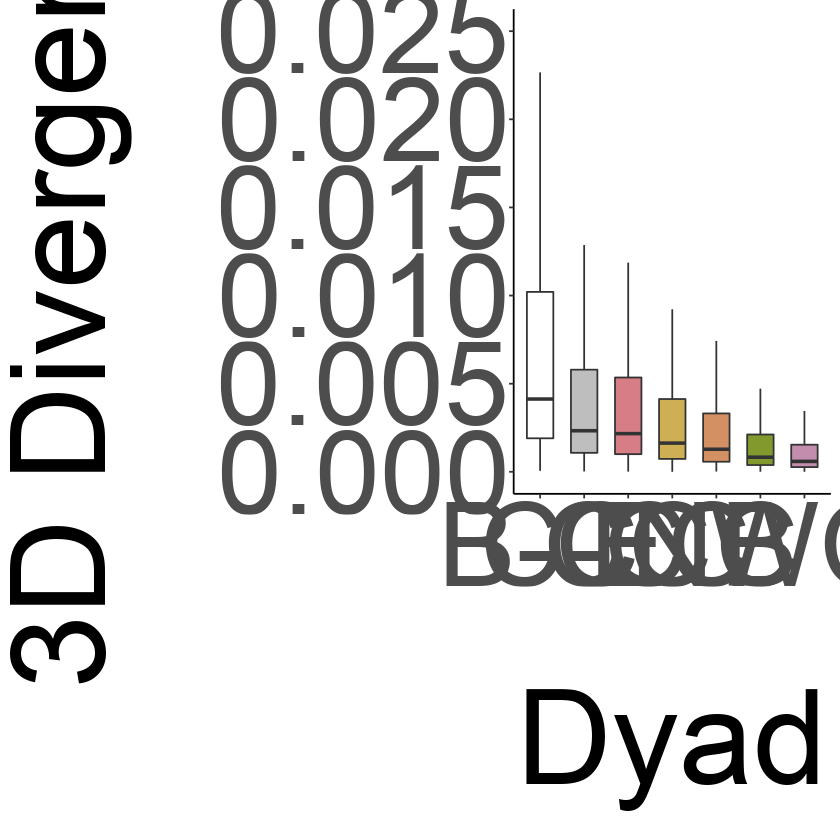

In [22]:
dyad_boxplots_simple <- ggplot(comparisons_simple, aes(x = reorder(dyad_type, -divergence), y = divergence, fill = dyad_type), fill = 'transparent') + geom_boxplot(outlier.shape = NA, width = 0.6) +
xlab('\nDyad') + ylab('3D Divergence\n') + 
coord_cartesian(ylim = c(0,0.025)) + theme_classic() + theme(panel.background = element_rect(fill = 'transparent', colour = NA), plot.background = element_rect(fill = 'transparent', colour = NA)) +
theme(text = element_text(family = 'Arial')) +
scale_x_discrete(labels = c('B-C','C-C','CC','EC','NC','B','WC')) +
scale_fill_manual(values = c(ppn_color, 'white', 'grey', ptt_color, pts_color, pte_color, ptv_color)) +
theme(axis.title = element_text(size = 32), axis.text.x = element_text(size = 28), axis.text.y = element_text(size = 28)) +
theme(legend.position = 'none') 

dyad_boxplots_simple

In [23]:
pdf('main_figs/dyad_boxplots.pdf', height = 18, width = 18, bg = 'transparent')
dyad_boxplots_simple
dev.off()

png 
  2

## TADs Distribution and Location

In [24]:
chrs = read.csv('../data/metadata/panTro6_chr_lengths.txt', sep = '\t', header = FALSE)
names(chrs) <- c('chr','length')
chrs$chr <- factor(chrs$chr, levels = c('chr1','chr2A','chr2B','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX'))
head(chrs)

chr   length   
1 chr1  224244399
2 chr2A 108022953
3 chr2B 128755405
4 chr3  196562556
5 chr4  189151597
6 chr5  159319378

In [25]:
excluded_windows = read.csv('../data/metadata/panTro6_excluded_windows.bed', sep = '\t', header = FALSE)
names(excluded_windows) <- c('chr','start','end')
excluded_windows$chr <- as.factor(excluded_windows$chr)

In [26]:
TADs = read.csv('../data/annotations/panTro6_TADs.bed', sep = '\t', header = FALSE)
names(TADs) <- c('chr','start','end','score','C3624_overlap','C3649_overlap','C3651_overlap','C40300_overlap')
TADs$lengths <- TADs$end - TADs$start
TADs$chr <- as.factor(TADs$chr)

In [27]:
nrow(TADs)

[1] 7812

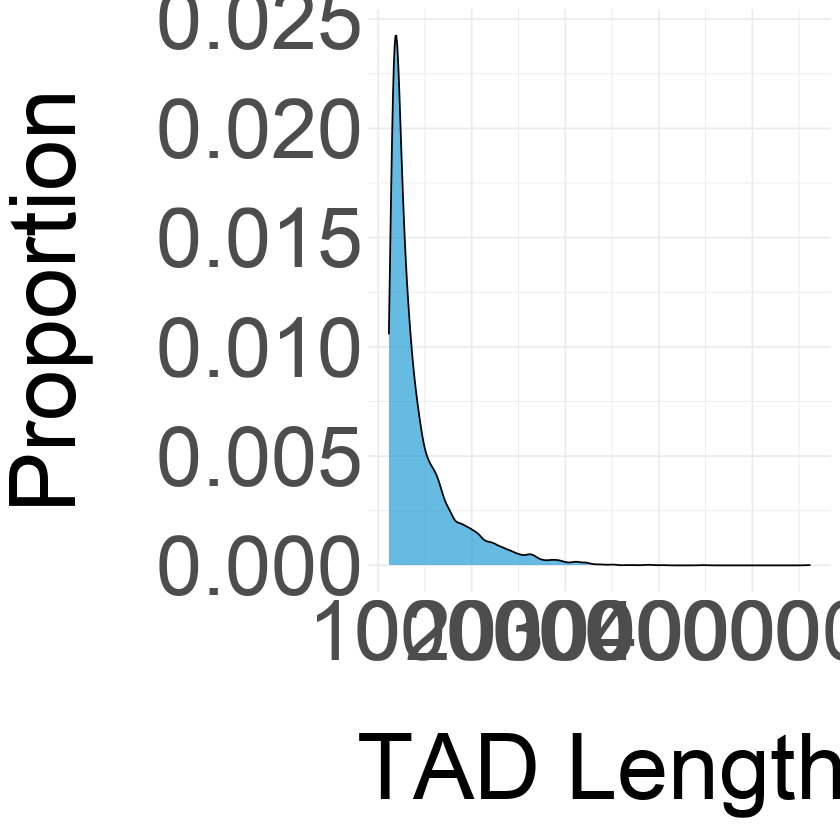

In [28]:
TADs_length_distribution_plot <- ggplot(TADs, aes(lengths, ..count..)) + geom_density(fill = '#008ECE', alpha = 0.6) + 
xlab('\nTAD Length') + ylab('Proportion\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

TADs_length_distribution_plot

Warning message:
“Removed 64 rows containing missing values (geom_rect).”


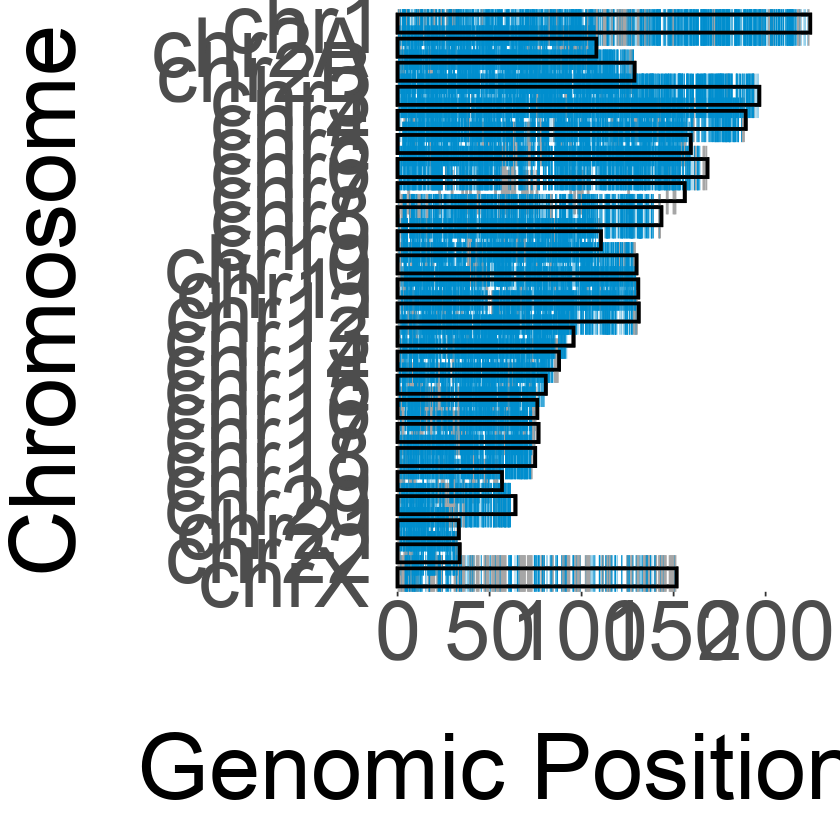

In [29]:
TADs_ideogram = ggplot() + geom_col(data = chrs, aes(x = chr, y = length), fill = NA, color = 'black', size = 1.05, width = 0.75) +
    coord_flip() + scale_x_discrete(limits = rev(levels(chrs$chr))) + scale_y_continuous(labels=c(0,50,100,150,200), breaks = c(0,50000000,100000000,150000000,200000000)) +
    geom_rect(data = excluded_windows, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = 'grey65', alpha = 0.3, size = 12.5) +
    geom_rect(data = TADs, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = '#008ECE', alpha = 0.3, size = 12.5) +
    geom_col(data = chrs, aes(x = chr, y = length), fill = NA, color = 'black', size = 1.05, width = 0.75) +
    xlab('Chromosome\n') + ylab ('\nGenomic Position (Mb)') +
    theme_classic() + theme(text = element_text(family = 'Arial')) + theme(axis.line = element_blank(), axis.ticks.y = element_blank()) +
    theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

TADs_ideogram

In [30]:
column <- plot_grid(TADs_length_distribution_plot, TADs_ideogram, labels = c('A','B'), label_size = 30, rel_heights = c(0.25,0.75), ncol = 1, scale = 0.9)

Warning message:
“Removed 64 rows containing missing values (geom_rect).”


In [31]:
pdf('suppl_figs/TADs_distribution_and_ideogram.pdf', height = 22, width = 16)
column
dev.off()

png 
  2

## Bonobo - Chimpanzee Dyad Separation Counts

In [32]:
ppn_pt_dyad_separation_counts = read.csv('../data/dataframes/ppn_pt_dyad_separation_counts.txt', sep = '\t', header = FALSE)
names(ppn_pt_dyad_separation_counts) <- c('window','n_non_ppn_pt_dyads')

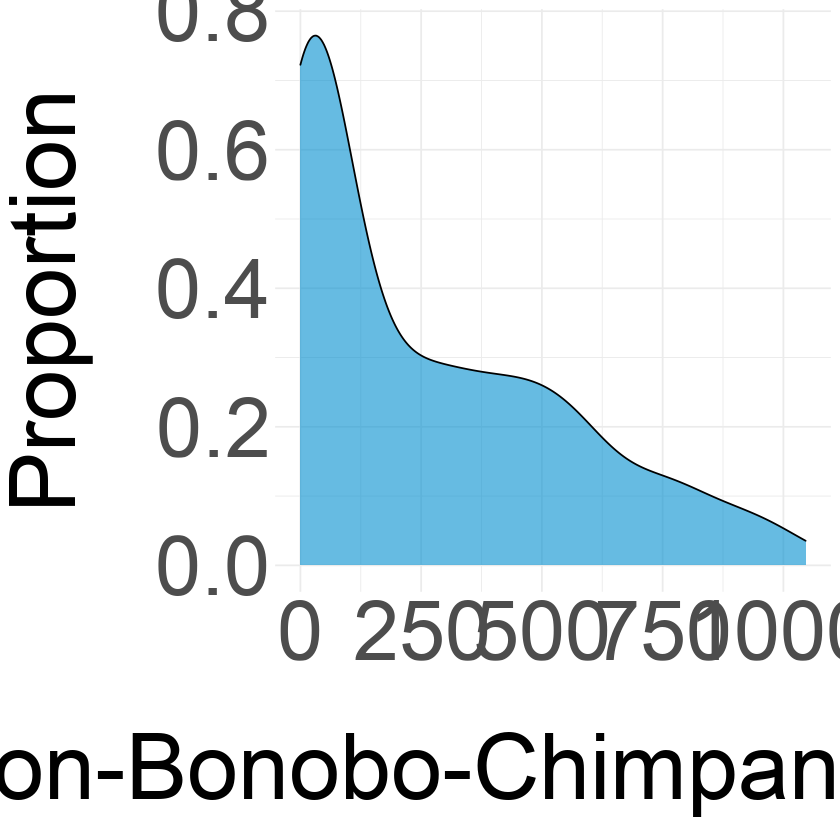

In [33]:
ppn_pt_dyad_separation_counts_plot <- ggplot(ppn_pt_dyad_separation_counts, aes(n_non_ppn_pt_dyads, ..count..)) + geom_density(fill = '#008ECE', alpha = 0.6) + 
xlab('\nN Non-Bonobo-Chimpanzee Dyads') + ylab('Proportion\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

ppn_pt_dyad_separation_counts_plot

In [34]:
pdf('suppl_figs/ppn_pt_dyad_separation_counts_plot.pdf', height = 8, width = 12)
ppn_pt_dyad_separation_counts_plot
dev.off()

png 
  2

## Position of Divergent 3d Modifying Variants in TADs

In [35]:
divergent_3d_modifying_variants_position_in_TAD = read.csv('../data/divergent_windows/ppn_pt_divergent_3d_modifying_variant_variant_positions_in_TADs.txt', sep = '\t', header = FALSE)
names(divergent_3d_modifying_variants_position_in_TAD) <- c('position')

Warning message in file(file, "rt"):
“cannot open file '../data/divergent_windows/ppn_pt_divergent_3d_modifying_variant_variant_positions_in_TADs.txt': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
divergent_3d_modifying_variants_position_in_TAD_histogram <- ggplot(divergent_3d_modifying_variants_position_in_TAD, aes(x = position)) + geom_histogram(binwidth = 0.05, center = 0.025, color = 'black', fill = 'grey85', alpha = 0.6) +
xlab('\nPosition in TAD') + ylab('N 3d Modifying Variants\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

divergent_3d_modifying_variants_position_in_TAD_histogram

In [ ]:
pdf('suppl_figs/divergent_3d_modifying_variants_position_in_TAD_histogram.pdf', height = 8, width = 12)
divergent_3d_modifying_variants_position_in_TAD_histogram
dev.off()

## Bonobo - Chimp Ideogram

In [6]:
chrs = read.csv('../data/metadata/panTro6_chr_lengths.txt', sep = '\t', header = FALSE)
names(chrs) <- c('chr','length')
chrs$chr <- factor(chrs$chr, levels = c('chr1','chr2A','chr2B','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX'))
head(chrs)

chr   length   
1 chr1  224244399
2 chr2A 108022953
3 chr2B 128755405
4 chr3  196562556
5 chr4  189151597
6 chr5  159319378

In [7]:
excluded_windows = read.csv('../data/metadata/panTro6_excluded_windows.bed', sep = '\t', header = FALSE)
names(excluded_windows) <- c('chr','start','end')
excluded_windows$chr <- as.factor(excluded_windows$chr)

In [9]:
clustering_windows = read.csv('../data/clustering_windows/ppn_pt_clustering_windows.bed', sep = '\t', header = FALSE)
names(clustering_windows) <- c('chr','start','end')
clustering_windows$chr <- as.factor(clustering_windows$chr)

In [ ]:
divergent_windows = read.csv('../data/divergent_windows/ppn_pt_divergent_windows.bed', sep = '\t', header = FALSE)
names(divergent_windows) <- c('chr','start','end')
divergent_windows$chr <- as.factor(divergent_windows$chr)

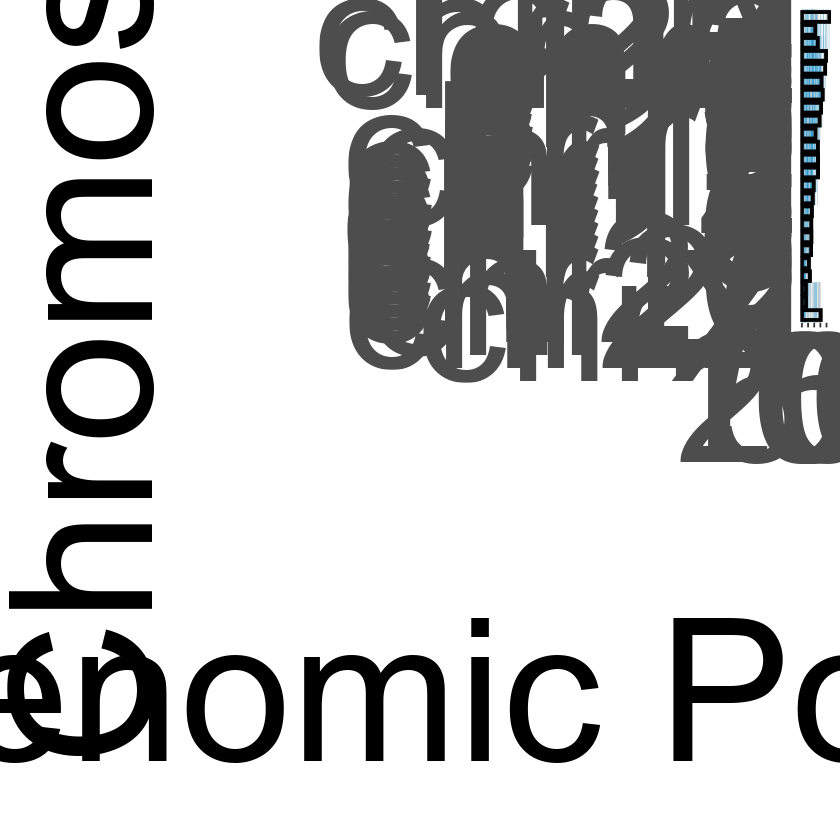

In [22]:
ppn_pt_windows_ideogram = ggplot() + geom_col(data = chrs, aes(x = chr, y = length), fill = NA, color = 'black', size = 1.05, width = 0.75) +
    coord_flip() + scale_x_discrete(limits = rev(levels(chrs$chr))) + scale_y_continuous(labels=c(0,50,100,150,200), breaks = c(0,50000000,100000000,150000000,200000000)) +
    geom_rect(data = excluded_windows, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = 'grey80', alpha = 0.3, size = 18.5) +
    geom_rect(data = clustering_windows, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = '#008ECE', alpha = 0.3, size = 18.5) +
    #geom_rect(data = divergent_windows, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = 'red', alpha = 0.3, size = 16) +
    geom_col(data = chrs, aes(x = chr, y = length), fill = NA, color = 'black', size = 1.05, width = 0.75) +
    xlab('Chromosome\n') + ylab ('\nGenomic Position (Mb)') +
    theme_classic() + theme(text = element_text(family = 'Arial')) + theme(axis.line = element_blank(), axis.ticks.y = element_blank()) +
    theme(axis.title = element_text(size = 48), axis.text.x = element_text(size = 44), axis.text.y = element_text(size = 44)) +
    scale_color_manual(values = c('grey65','blue','red'), labels = c('Excluded window','Clustering Window','Divergent Window')) +
    theme(legend.position = 'bottom')

ppn_pt_windows_ideogram

In [23]:
pdf('suppl_figs/ppn_pt_clustering_windows_ideogram.pdf', height = 20, width = 16)
ppn_pt_windows_ideogram
dev.off()

png 
  2

## Example Bonobo - Chimpanzee Clustering Window Distribution

In [64]:
subset <- subset(comparisons, window == 'chr2A_58720256')

In [65]:
subset$label <- ifelse(subset$dyad_type == ('ppn-pt'), 'Bonobo-Chimpanzee Comparison', 'Chimpanzee-Chimpanzee Comparison')

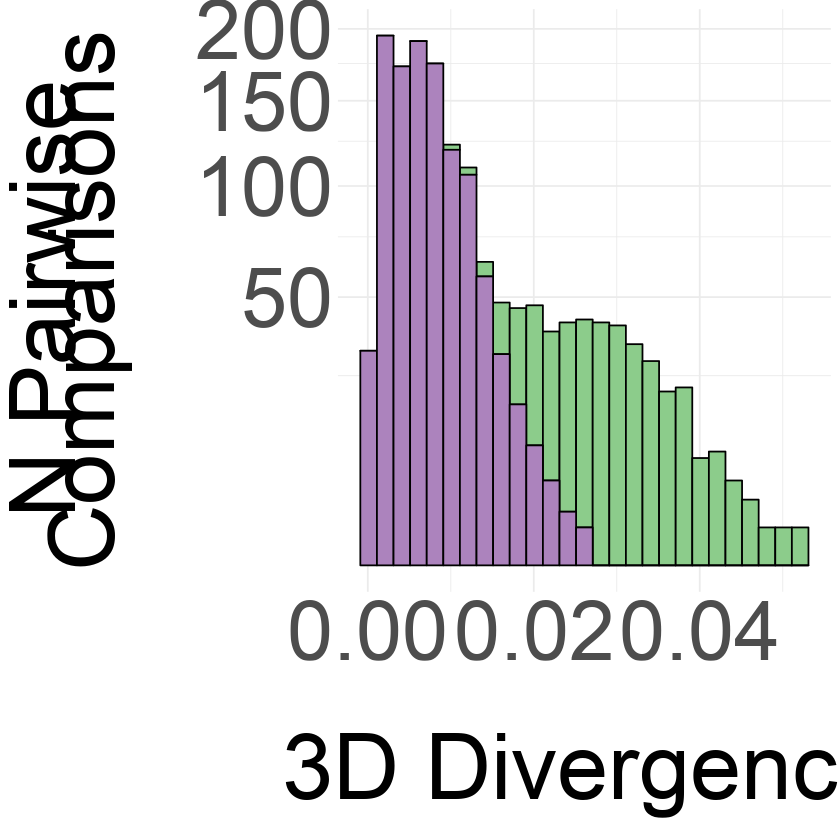

In [66]:
example_ppn_pt_clustering_dist <- ggplot(subset, aes(x = divergence, fill = label)) + geom_histogram(binwidth = 0.002, center = 0.0001, color = 'black', position = 'stack') +
xlab('\n3D Divergence') + ylab('N Pairwise\nComparisons\n') + coord_trans(y = 'sqrt') +
scale_fill_manual(values = c('#8ccc8b', '#ac83bd')) +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) +
theme(legend.title = element_text(size = 20), legend.text = element_text(size = 20)) +
theme(legend.position = 'none')

example_ppn_pt_clustering_dist

In [76]:
pdf('suppl_figs/example_ppn_pt_clustering_distribution.pdf', height = 5, width = 12)
example_ppn_pt_clustering_dist
dev.off()

png 
  2

## Example Bonobo - Chimpanzee Divergent Window Distribution

In [68]:
subset <- subset(comparisons, window == 'chr2A_74973184')

In [69]:
subset$label <- ifelse(subset$dyad_type == ('ppn-pt'), 'Bonobo-Chimpanzee Comparison', 'Chimpanzee-Chimpanzee Comparison')

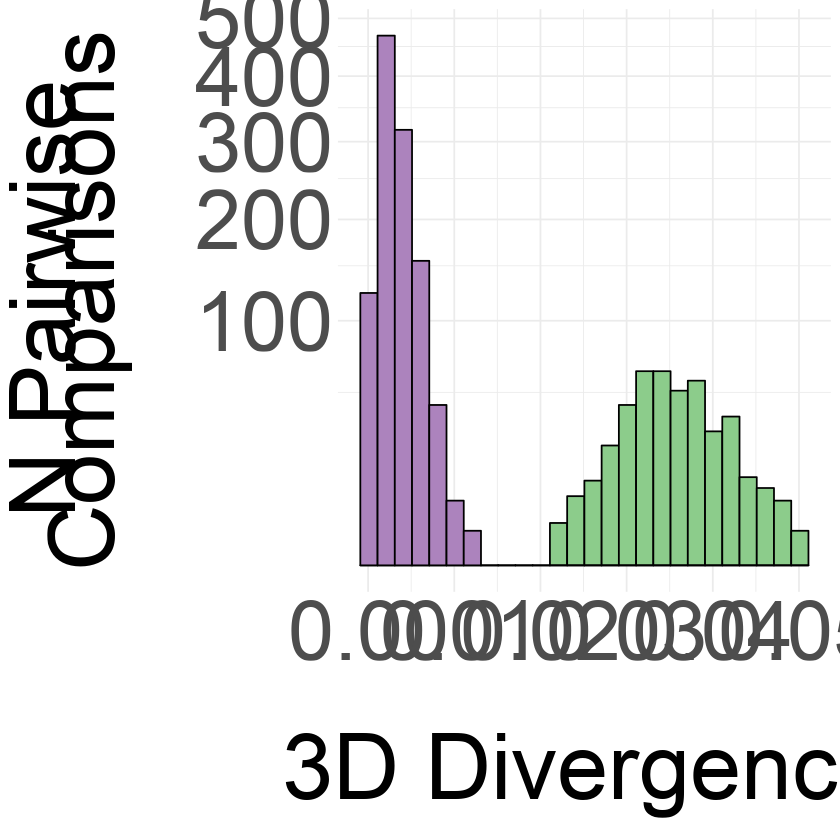

In [72]:
example_ppn_pt_divergent_dist <- ggplot(subset, aes(x = divergence, fill = label)) + geom_histogram(binwidth = 0.002, center = 0.0001, color = 'black', position = 'identity') +
xlab('\n3D Divergence') + ylab('N Pairwise\nComparisons\n') + coord_trans(y = 'sqrt') +
scale_fill_manual(values = c('#8ccc8b', '#ac83bd')) +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) +
theme(legend.title = element_text(size = 20), legend.text = element_text(size = 20)) +
theme(legend.position = 'none')

example_ppn_pt_divergent_dist

In [77]:
pdf('suppl_figs/example_ppn_pt_divergent_distribution.pdf', height = 5, width = 12)
example_ppn_pt_divergent_dist
dev.off()

png 
  2

## Bonobo - Chimpanzee Windows Figure

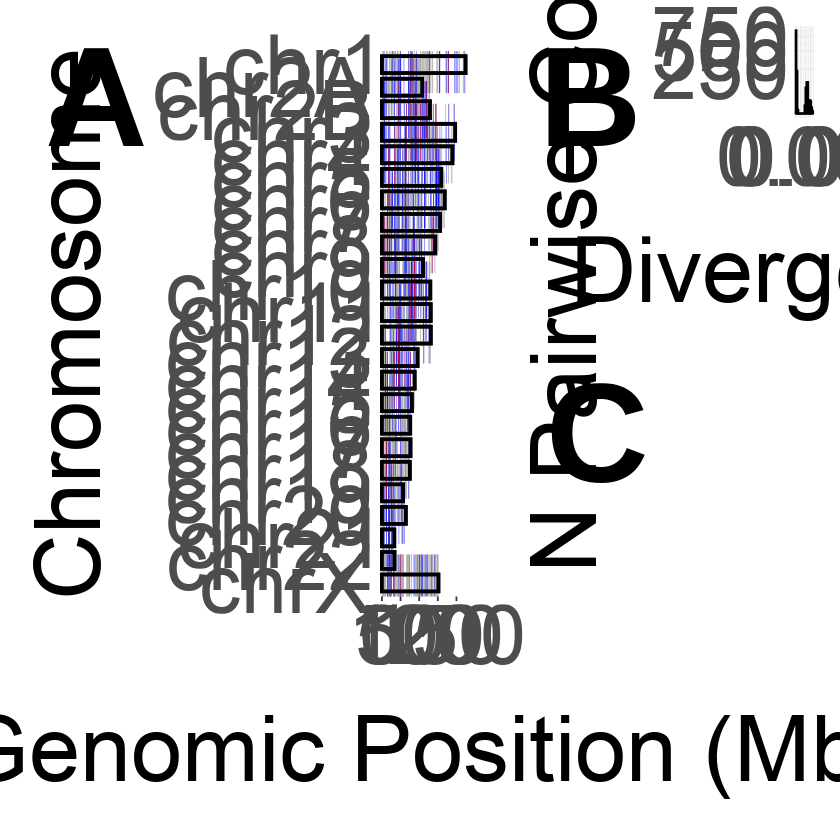

In [100]:
left_column <- plot_grid(ppn_pt_windows_ideogram, labels = c('A'), label_size = 34, ncol = 1, scale = 0.9)
right_column <- plot_grid(example_ppn_pt_divergence_dist, NULL, labels = c('B','C'), label_size = 34, ncol = 1, rel_heights = c(0.4,0.6), scale = 0.9)
lineage_comparison_figure <- plot_grid(left_column, right_column, nrow = 1, rel_widths = c(0.6,0.4))
lineage_comparison_figure

In [101]:
pdf('main_figs/ppn_pt_divergent_windows.pdf', height = 20, width = 24)
lineage_comparison_figure
dev.off()

png 
  2

## Example IDW Distribution <a class = 'anchor' id = 'exampleIDWdistribution'></a>

In [18]:
subset <- subset(comparisons, window == 'chr6_142606336')
head(subset)

ind1        ind2      dyad_type chr  window_start window        
3588  Akwaya-Jean Alfred    pte-ptt   chr6 142606336    chr6_142606336
7857  Akwaya-Jean Alice     pte-ptv   chr6 142606336    chr6_142606336
12126 Akwaya-Jean Andromeda pte-pts   chr6 142606336    chr6_142606336
16395 Akwaya-Jean Athanga   pte-pts   chr6 142606336    chr6_142606336
20664 Akwaya-Jean Berta     pte-ptv   chr6 142606336    chr6_142606336
24933 Akwaya-Jean Bihati    pte-pts   chr6 142606336    chr6_142606336
      mse          spearman  divergence  seq_diff
3588  0.0004772316 0.9974484 0.002551554 1945    
7857  0.0006678504 0.9964214 0.003578635 2203    
12126 0.0007363707 0.9958933 0.004106673 2382    
16395 0.0005960951 0.9969894 0.003010646 2338    
20664 0.0002165072 0.9986340 0.001365972 2035    
24933 0.0004397997 0.9977437 0.002256258 2194

In [19]:
subset$label <- ifelse(subset$ind1 == ('Bono') | subset$ind2 == ('Bono'), 'Comparison includes Bono', 'Comparison excludes Bono')
head(subset)

ind1        ind2      dyad_type chr  window_start window        
3588  Akwaya-Jean Alfred    pte-ptt   chr6 142606336    chr6_142606336
7857  Akwaya-Jean Alice     pte-ptv   chr6 142606336    chr6_142606336
12126 Akwaya-Jean Andromeda pte-pts   chr6 142606336    chr6_142606336
16395 Akwaya-Jean Athanga   pte-pts   chr6 142606336    chr6_142606336
20664 Akwaya-Jean Berta     pte-ptv   chr6 142606336    chr6_142606336
24933 Akwaya-Jean Bihati    pte-pts   chr6 142606336    chr6_142606336
      mse          spearman  divergence  seq_diff label                   
3588  0.0004772316 0.9974484 0.002551554 1945     Comparison excludes Bono
7857  0.0006678504 0.9964214 0.003578635 2203     Comparison excludes Bono
12126 0.0007363707 0.9958933 0.004106673 2382     Comparison excludes Bono
16395 0.0005960951 0.9969894 0.003010646 2338     Comparison excludes Bono
20664 0.0002165072 0.9986340 0.001365972 2035     Comparison excludes Bono
24933 0.0004397997 0.9977437 0.002256258 2194     Comparison excludes Bono

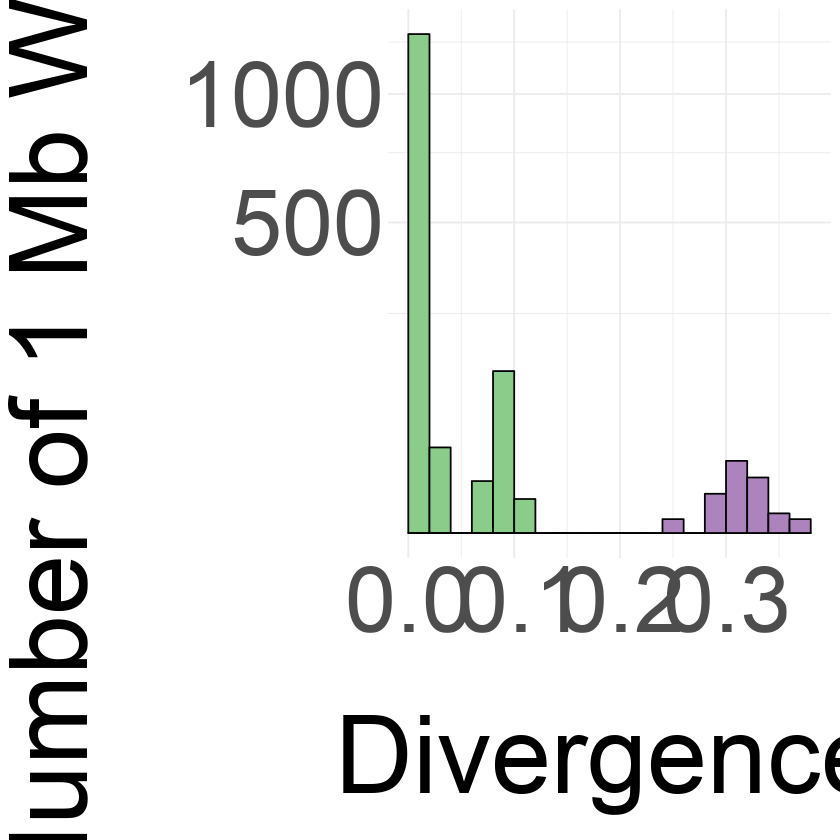

In [20]:
example_IDW_divergence_dist <- ggplot(subset, aes(x = divergence, fill = label)) + geom_histogram(binwidth = 0.02, center = 0.01, color = 'black', position = 'identity') +
xlab('\nDivergence') + ylab('Number of 1 Mb Windows\n') + coord_trans(y = 'sqrt') +
scale_fill_manual(labels = c('All Windows', 'IDWs'), name = 'Window Type   ', values = c('#8ccc8b', '#ac83bd')) +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 26), axis.text.x = element_text(size = 22), axis.text.y = element_text(size = 22)) +
theme(legend.position = 'none')

example_IDW_divergence_dist

In [21]:
pdf('example_IDW_divergence_dist.pdf', height = 8, width = 12)
example_IDW_divergence_dist
dev.off()

png 
  2

## Individually Driven Windows Sequence Divergence <a class = 'anchor' id = 'idwsequencedivergence'></a>

Write a function to plot the individually driven windows sequence divergence compared to other dyads for that window.

In [22]:
individual_driven_windows_seq_diff_plot <- function(chr_start, ind) {
    subset <- subset(comparisons, window == chr_start)
    subset$x_coordinate <- seq_along(subset$divergence)
    subset$individual <- ifelse(subset$ind1 == ind | subset$ind2 == ind, 'yes', 'no')
    x <- as.list(strsplit(chr_start, split = '_')[[1]]) # no idea what the [[1]] does here
    x_label <- paste(x[1], x[2], sep = ': ')
    
    ggplot(subset, aes(x = x_coordinate, y = seq_diff, color = individual)) +
    geom_point(data = subset(subset, individual == 'no'), alpha = 0.7) +
    geom_point(data = subset(subset, individual == 'yes'), color = 'blue') +
    scale_color_manual(values = c('no' = '#D3D3D3', 'yes' = 'blue')) +
    xlab(x_label) + ylab('N Pairwise\nSequence Differences\n') + theme_minimal() +
    theme(text = element_text(family = 'Arial')) +
    theme(axis.title.x = element_text(margin = margin(t = 12, r = 0, b = 0, l = 0))) + #adjust x-axis label because we've used a variable for the label
    theme(axis.title = element_text(size = 12), axis.text.x = element_text(size = 12), axis.text.y = element_text(size = 12)) +
    theme(legend.position = 'none')
}

Apply to the conservative set of divergent windows.

In [23]:
IDW1 <- individual_driven_windows_seq_diff_plot('chr11_20971520', 'Jimmie')
IDW2 <- individual_driven_windows_seq_diff_plot('chr14_26738688', 'Luky')
IDW3 <- individual_driven_windows_seq_diff_plot('chr1_72351744', 'Lara')
IDW4 <- individual_driven_windows_seq_diff_plot('chr1_168820736', 'Berta')
IDW5 <- individual_driven_windows_seq_diff_plot('chr1_169345024', 'Berta')
IDW6 <- individual_driven_windows_seq_diff_plot('chr2A_76021760', 'Coco-chimp')
IDW7 <- individual_driven_windows_seq_diff_plot('chr4_82837504', 'Frederike')
IDW8 <- individual_driven_windows_seq_diff_plot('chr5_95420416', 'Desmond')
IDW9 <- individual_driven_windows_seq_diff_plot('chr6_142606336', 'Bono')
IDW10 <- individual_driven_windows_seq_diff_plot('chr7_105906176', 'Alice')
IDW11 <- individual_driven_windows_seq_diff_plot('chr8_112197632', 'Athanga')
IDW12 <- individual_driven_windows_seq_diff_plot('chr8_128974848', 'Damian')

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label

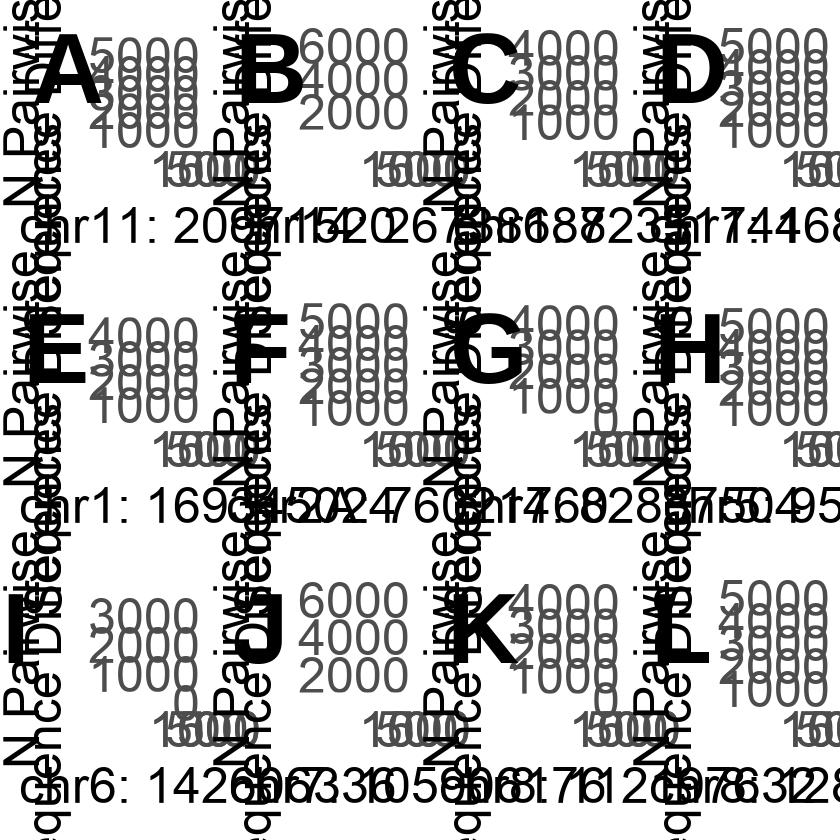

In [24]:
first_row <- plot_grid(IDW1, IDW2, IDW3, IDW4, labels = c('A','B','C','D'), label_size = 24, nrow = 1, scale = 0.8)
second_row <- plot_grid(IDW5, IDW6, IDW7, IDW8, labels = c('E','F','G','H'), label_size = 24, nrow = 1, scale = 0.8)
third_row <- plot_grid(IDW9, IDW10, IDW11, IDW12, labels = c('I','J','K','L'), label_size = 24, nrow = 1, scale = 0.8)
top_IDW_seq_diff_figure <- plot_grid(first_row, second_row, third_row, ncol = 1)
top_IDW_seq_diff_figure

In [25]:
pdf('suppl_figs/top_IDW_seq_diff_figure.pdf', height = 12, width = 20)
top_IDW_seq_diff_figure
dev.off()

png 
  2

## Global 3D Divergence

In [59]:
avg_diff = aggregate(divergence ~ ind1 + ind2, data = comparisons, FUN = mean)
avg_diff$ind1 <- as.factor(avg_diff$ind1)
avg_diff$ind2 <- as.factor(avg_diff$ind2)
avg_diff$divergence <- as.numeric(avg_diff$divergence)
head(avg_diff)

ind1        ind2      divergence 
1 Akwaya-Jean Alfred    0.007259394
2 Akwaya-Jean Alice     0.005878872
3 Alfred      Alice     0.007979371
4 Akwaya-Jean Andromeda 0.006831268
5 Alfred      Andromeda 0.006851950
6 Alice       Andromeda 0.006648872

In [60]:
IDs <- sort(unique(c(as.character(avg_diff$ind1), as.character(avg_diff$ind2))))
div_mat <- matrix(NA, nrow = 56, ncol = 56, dimnames = list(IDs, IDs))
diag(div_mat) <- 0

div_mat[as.matrix(avg_diff[, 1:2])] <- avg_diff[,3]
div_mat[is.na(div_mat)] <- 0
div_mat <- div_mat + t(div_mat)

In [61]:
head(div_mat)

Akwaya-Jean Alfred      Alice       Andromeda   Athanga    
Akwaya-Jean 0.000000000 0.007259394 0.005878872 0.006831268 0.007519611
Alfred      0.007259394 0.000000000 0.007979371 0.006851950 0.007253781
Alice       0.005878872 0.007979371 0.000000000 0.006648872 0.007863039
Andromeda   0.006831268 0.006851950 0.006648872 0.000000000 0.005597327
Athanga     0.007519611 0.007253781 0.007863039 0.005597327 0.000000000
Berta       0.005879428 0.007867211 0.002791165 0.006661055 0.007705001
            Berta       Bihati      Blanquita   Bono       Bosco       ⋯
Akwaya-Jean 0.005879428 0.006814017 0.007590535 0.01136031 0.005776228 ⋯
Alfred      0.007867211 0.007041899 0.006016710 0.01181237 0.007870127 ⋯
Alice       0.002791165 0.006966017 0.008040127 0.01042843 0.002457807 ⋯
Andromeda   0.006661055 0.005340643 0.006453835 0.01091377 0.006736312 ⋯
Athanga     0.007705001 0.005451620 0.006819011 0.01181491 0.007790023 ⋯
Berta       0.000000000 0.006815288 0.007849158 0.01054673 0.002686919 ⋯
            SeppToni    Taweh       Tibe        Tongo       Trixie     
Akwaya-Jean 0.006119049 0.004147638 0.007163298 0.007113874 0.007497796
Alfred      0.008227124 0.007354917 0.006477226 0.006974906 0.007348317
Alice       0.002674750 0.005990156 0.007275173 0.007279725 0.007537894
Andromeda   0.006783047 0.006709758 0.006526131 0.005339436 0.005376073
Athanga     0.007927406 0.007563159 0.006914957 0.005227979 0.005603619
Berta       0.003102045 0.006072190 0.007167807 0.007141306 0.007462923
            Ula         Vaillant    Vincent     Washu       Yogui      
Akwaya-Jean 0.007706850 0.007484937 0.007159865 0.007145899 0.007281559
Alfred      0.006728189 0.006838622 0.007256572 0.007359787 0.006437325
Alice       0.007873593 0.008314888 0.007306473 0.007726933 0.007666932
Andromeda   0.006544781 0.006685826 0.004282637 0.005507983 0.006694648
Athanga     0.007036638 0.007563723 0.005824009 0.005893105 0.007117535
Berta       0.007819146 0.008261291 0.007156262 0.007639440 0.007477932

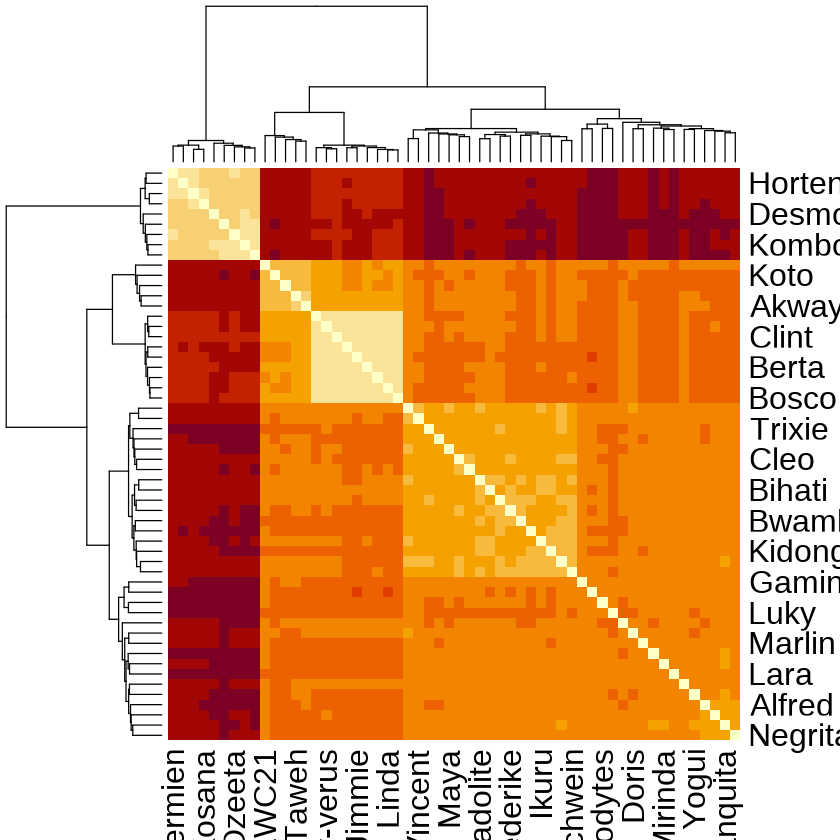

In [62]:
heatmap(div_mat, symm=TRUE)

[1] "Hermien"           "Hortense"          "Natalie"          
 [4] "Kosana"            "Desmond"           "Kumbuka"          
 [7] "Dzeeta"            "Kombote"           "Bono"             
[10] "Julie-LWC21"       "Koto"              "Damian"           
[13] "Taweh"             "Akwaya-Jean"       "Koby"             
[16] "Cindy-verus"       "Clint"             "SeppToni"         
[19] "Jimmie"            "Berta"             "Alice"            
[22] "Linda"             "Bosco"             "Andromeda"        
[25] "Vincent"           "Trixie"            "Washu"            
[28] "Maya"              "Cleo"              "Coco-chimp"       
[31] "Mgbadolite"        "Bihati"            "Tongo"            
[34] "Frederike"         "Bwamble"           "Athanga"          
[37] "Ikuru"             "Kidongo"           "Nakuu"            
[40] "Cindy-schwein"     "Gamin"             "Vaillant"         
[43] "Cindy-troglodytes" "Luky"              "Julie-A959"       
[46] "Doris"             "Marlin"            "Ula"              
[49] "Mirinda"           "Lara"              "Tibe"             
[52] "Yogui"             "Alfred"            "Brigitta"         
[55] "Blanquita"         "Negrita"

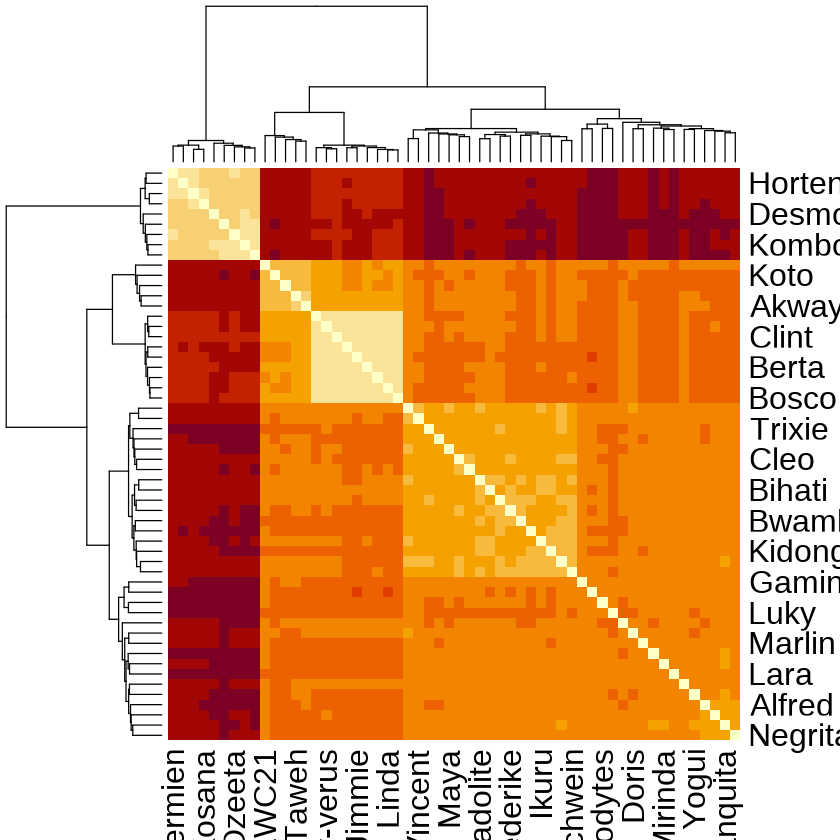

In [63]:
div_heatmap <- heatmap(div_mat, symm=TRUE)
reordered_div_mat <- div_mat[div_heatmap$rowInd, div_heatmap$colInd]
reordered_IDs <- colnames(div_mat[div_heatmap$rowInd, div_heatmap$colInd])
reordered_IDs

In [64]:
pdf('suppl_figs/symmetrical_mean_3d_divergence_heatmap.pdf', height = 15, width = 15)
heatmap(div_mat, symm=TRUE) # does not save as an object so we just call the command again
dev.off()

png 
  2

In [65]:
head(div_mat)

Akwaya-Jean Alfred      Alice       Andromeda   Athanga    
Akwaya-Jean 0.000000000 0.007259394 0.005878872 0.006831268 0.007519611
Alfred      0.007259394 0.000000000 0.007979371 0.006851950 0.007253781
Alice       0.005878872 0.007979371 0.000000000 0.006648872 0.007863039
Andromeda   0.006831268 0.006851950 0.006648872 0.000000000 0.005597327
Athanga     0.007519611 0.007253781 0.007863039 0.005597327 0.000000000
Berta       0.005879428 0.007867211 0.002791165 0.006661055 0.007705001
            Berta       Bihati      Blanquita   Bono       Bosco       ⋯
Akwaya-Jean 0.005879428 0.006814017 0.007590535 0.01136031 0.005776228 ⋯
Alfred      0.007867211 0.007041899 0.006016710 0.01181237 0.007870127 ⋯
Alice       0.002791165 0.006966017 0.008040127 0.01042843 0.002457807 ⋯
Andromeda   0.006661055 0.005340643 0.006453835 0.01091377 0.006736312 ⋯
Athanga     0.007705001 0.005451620 0.006819011 0.01181491 0.007790023 ⋯
Berta       0.000000000 0.006815288 0.007849158 0.01054673 0.002686919 ⋯
            SeppToni    Taweh       Tibe        Tongo       Trixie     
Akwaya-Jean 0.006119049 0.004147638 0.007163298 0.007113874 0.007497796
Alfred      0.008227124 0.007354917 0.006477226 0.006974906 0.007348317
Alice       0.002674750 0.005990156 0.007275173 0.007279725 0.007537894
Andromeda   0.006783047 0.006709758 0.006526131 0.005339436 0.005376073
Athanga     0.007927406 0.007563159 0.006914957 0.005227979 0.005603619
Berta       0.003102045 0.006072190 0.007167807 0.007141306 0.007462923
            Ula         Vaillant    Vincent     Washu       Yogui      
Akwaya-Jean 0.007706850 0.007484937 0.007159865 0.007145899 0.007281559
Alfred      0.006728189 0.006838622 0.007256572 0.007359787 0.006437325
Alice       0.007873593 0.008314888 0.007306473 0.007726933 0.007666932
Andromeda   0.006544781 0.006685826 0.004282637 0.005507983 0.006694648
Athanga     0.007036638 0.007563723 0.005824009 0.005893105 0.007117535
Berta       0.007819146 0.008261291 0.007156262 0.007639440 0.007477932

In [66]:
avg_seq_diff = aggregate(seq_diff ~ ind1 + ind2, data = comparisons, FUN = mean)
head(avg_seq_diff)

ind1        ind2      seq_diff
1 Akwaya-Jean Alfred    2605.174
2 Akwaya-Jean Alice     1967.934
3 Alfred      Alice     2691.099
4 Akwaya-Jean Andromeda 2338.538
5 Alfred      Andromeda 2425.921
6 Alice       Andromeda 2284.159

In [67]:
seq_mat <- matrix(NA, nrow = 56, ncol = 56, dimnames = list(reordered_IDs, reordered_IDs))
diag(seq_mat) <- 0

seq_mat[as.matrix(avg_seq_diff[, 1:2])] <- avg_seq_diff[,3]

In [68]:
seq_mat[is.na(seq_mat)] <- 0
seq_mat <- seq_mat + t(seq_mat)

In [69]:
head(seq_mat)

Hermien  Hortense Natalie   Kosana    Desmond  Kumbuka   Dzeeta   
Hermien     0.000 1074.223 1083.7312 1082.3217 1007.540 1060.9215  849.3088
Hortense 1074.223    0.000 1019.1034 1059.0152 1092.165 1071.6837 1073.0593
Natalie  1083.731 1019.103    0.0000  890.9624 1100.715  989.7111 1084.9835
Kosana   1082.322 1059.015  890.9624    0.0000 1101.530 1011.5744 1084.9600
Desmond  1007.540 1092.165 1100.7149 1101.5303    0.000 1071.0878 1006.9419
Kumbuka  1060.921 1071.684  989.7111 1011.5744 1071.088    0.0000 1054.2511
         Kombote   Bono     Julie-LWC21 ⋯ Marlin   Ula      Mirinda  Lara    
Hermien   994.8281 1013.905 3887.431    ⋯ 4101.128 4087.118 4133.940 4118.280
Hortense 1078.7432 1089.262 3895.948    ⋯ 4107.829 4094.299 4140.277 4125.481
Natalie  1081.2882 1093.208 3879.213    ⋯ 4088.636 4075.230 4121.037 4106.081
Kosana   1081.5529 1105.904 3877.884    ⋯ 4096.484 4083.689 4129.804 4114.576
Desmond   939.2190 1009.937 3978.186    ⋯ 4193.182 4181.721 4226.490 4211.457
Kumbuka  1047.1726 1060.230 3970.677    ⋯ 4178.139 4163.673 4209.003 4194.612
         Tibe     Yogui    Alfred   Brigitta Blanquita Negrita 
Hermien  4086.036 4164.280 4185.849 4173.143 4118.361  4116.568
Hortense 4092.092 4169.033 4191.081 4178.475 4125.625  4123.677
Natalie  4074.290 4150.381 4172.505 4160.682 4105.612  4104.571
Kosana   4081.332 4159.568 4182.230 4168.956 4114.304  4112.734
Desmond  4178.488 4203.344 4225.624 4212.646 4212.469  4209.876
Kumbuka  4161.566 4240.380 4263.383 4250.423 4195.079  4194.022

In [70]:
combined_mat <- matrix(NA, nrow = 56, ncol = 56, dimnames = list(reordered_IDs, reordered_IDs))
combined_mat[upper.tri(combined_mat)] <- div_mat[upper.tri(div_mat)]
combined_mat[lower.tri(combined_mat)] <- seq_mat[lower.tri(seq_mat)]

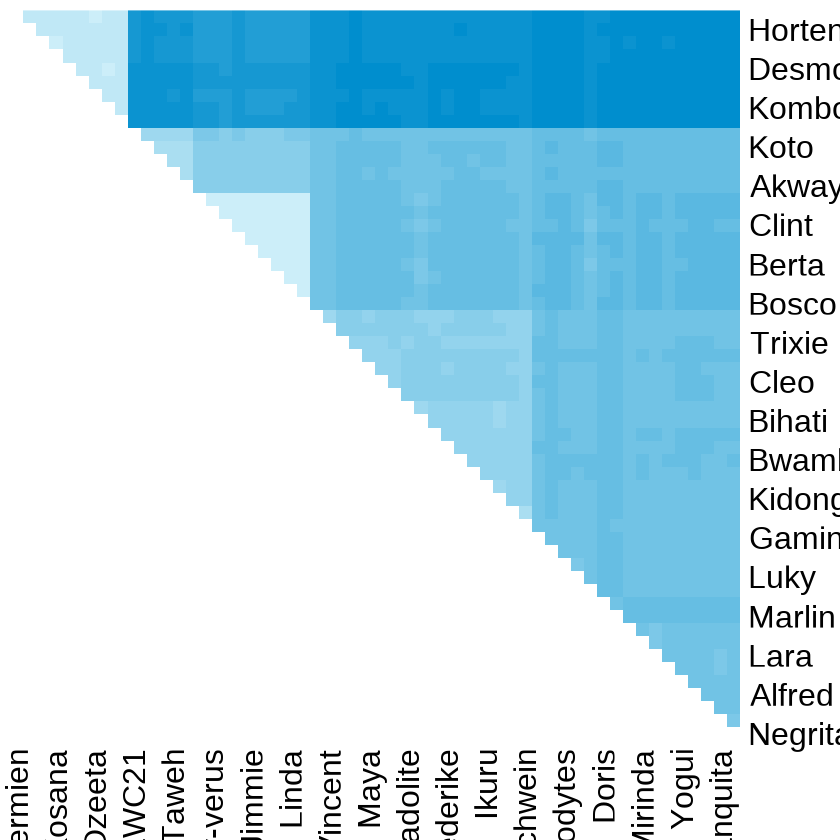

In [75]:
color_breaks = c(seq(0.002,0.013,length=19), seq(784,4264,length=20))
seq_palette <- colorRampPalette(c('#CCEEF9','#008ECE'))(n = 19)
div_palette <- colorRampPalette(c('white','white'))(n = 19) # color these out for a half matrix
col_palette <- c(div_palette,seq_palette)
heatmap(x = combined_mat, Rowv = NA, symm=TRUE, col = col_palette, breaks = color_breaks)

In [143]:
pdf('suppl_figs/mean_3d_divergence_heatmap.pdf', height = 15, width = 15)
heatmap(x = combined_mat, Rowv = NA, symm=TRUE, col = col_palette, breaks = color_breaks) # does not save as an object so we just call the command again
dev.off()

png 
  2

## Global 3D vs Sequence Divergence <a class = 'anchor' id = 'global3dvssequencedivergence'></a>

Let's start with sequence differences. Get the genome-wide average per pair.

In [28]:
avg_seq_diff = aggregate(seq_diff ~ ind1 + ind2, data = comparisons, FUN = mean)
head(avg_seq_diff)

ind1        ind2      seq_diff
1 Akwaya-Jean Alfred    2605.174
2 Akwaya-Jean Alice     1967.934
3 Alfred      Alice     2691.099
4 Akwaya-Jean Andromeda 2338.538
5 Alfred      Andromeda 2425.921
6 Alice       Andromeda 2284.159

In [29]:
min(avg_seq_diff$seq_diff)

[1] 784.9553

In [30]:
max(avg_seq_diff$seq_diff)

[1] 4263.383

Now make a matrix.

In [31]:
IDs <- sort(unique(c(as.character(avg_seq_diff$ind1), as.character(avg_seq_diff$ind2))))
seq_mat <- matrix(NA, nrow = length(IDs), ncol = length(IDs), dimnames = list(IDs, IDs))
diag(seq_mat) <- NA

seq_mat[as.matrix(avg_seq_diff[, 1:2])] <- avg_seq_diff[,3]
head(seq_mat)

Akwaya-Jean Alfred   Alice    Andromeda Athanga  Berta    Bihati  
Akwaya-Jean NA          2605.174 1967.934 2338.538  2432.706 1950.855 2337.939
Alfred      NA                NA 2691.099 2425.921  2437.337 2677.441 2428.551
Alice       NA                NA       NA 2284.159  2504.512  807.155 2225.337
Andromeda   NA                NA       NA       NA  1911.804 2279.309 1840.843
Athanga     NA                NA       NA       NA        NA 2483.767 1763.338
Berta       NA                NA       NA       NA        NA       NA 2220.469
            Blanquita Bono     Bosco     ⋯ SeppToni  Taweh    Tibe     Tongo   
Akwaya-Jean 2588.612  3932.936 1948.1513 ⋯ 1980.7747 1468.014 2552.313 2422.679
Alfred      2304.199  4219.399 2683.3076 ⋯ 2701.4980 2606.818 2315.304 2447.592
Alice       2633.537  3760.638  840.6306 ⋯  813.0220 1978.297 2541.328 2430.533
Andromeda   2374.545  4022.821 2317.2560 ⋯ 2348.4041 2319.101 2365.814 1853.229
Athanga     2426.769  4107.509 2494.1776 ⋯ 2512.1295 2438.100 2421.059 1860.307
Berta       2617.424  3739.596  837.1502 ⋯  826.4303 1963.725 2518.120 2432.985
            Trixie   Ula      Vaillant Vincent  Washu    Yogui   
Akwaya-Jean 2478.330 2556.865 2610.692 2349.892 2459.556 2581.757
Alfred      2449.185 2286.777 2383.524 2426.721 2440.562 2299.319
Alice       2534.417 2560.958 2678.709 2352.774 2546.673 2630.316
Andromeda   1887.564 2345.108 2440.312 1520.014 1899.958 2412.408
Athanga     1881.091 2419.081 2463.246 1909.684 1927.565 2426.835
Berta       2517.514 2545.012 2661.161 2343.207 2529.997 2607.569

Turn that matrix into a symmetric one.

In [32]:
seq_mat[is.na(seq_mat)] <- 0
seq_mat <- seq_mat + t(seq_mat)

Make a heatmap.

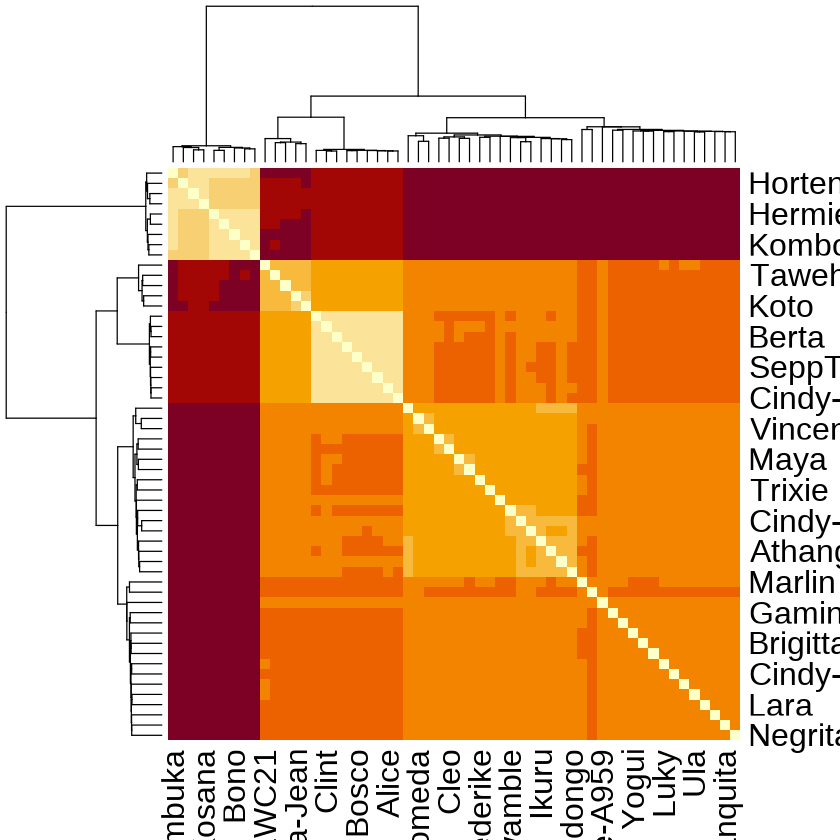

In [33]:
heatmap(x = seq_mat, symm=TRUE)

Now let's create a new matrix with the reordering preserved as well as a list of the row/column names in order.

[1] "Kumbuka"           "Hortense"          "Natalie"          
 [4] "Kosana"            "Hermien"           "Dzeeta"           
 [7] "Bono"              "Kombote"           "Desmond"          
[10] "Julie-LWC21"       "Taweh"             "Damian"           
[13] "Akwaya-Jean"       "Koto"              "Jimmie"           
[16] "Clint"             "Berta"             "Koby"             
[19] "Bosco"             "SeppToni"          "Linda"            
[22] "Alice"             "Cindy-verus"       "Bihati"           
[25] "Andromeda"         "Vincent"           "Coco-chimp"       
[28] "Cleo"              "Maya"              "Washu"            
[31] "Frederike"         "Trixie"            "Tongo"            
[34] "Bwamble"           "Cindy-schwein"     "Nakuu"            
[37] "Ikuru"             "Athanga"           "Mgbadolite"       
[40] "Kidongo"           "Marlin"            "Doris"            
[43] "Julie-A959"        "Gamin"             "Vaillant"         
[46] "Yogui"             "Brigitta"          "Alfred"           
[49] "Luky"              "Cindy-troglodytes" "Tibe"             
[52] "Ula"               "Lara"              "Mirinda"          
[55] "Blanquita"         "Negrita"

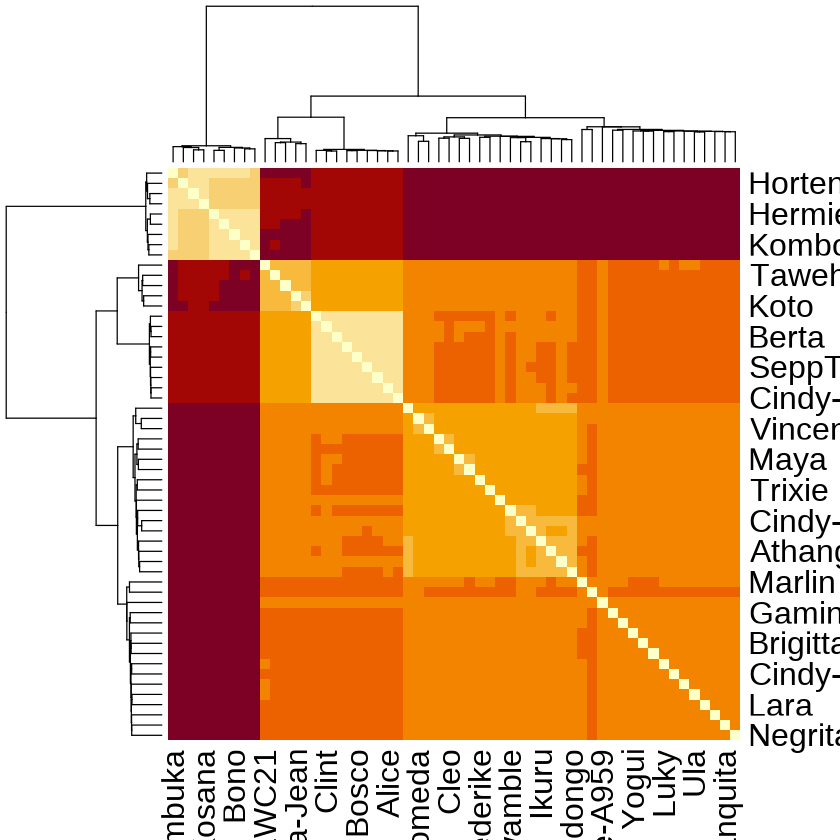

In [34]:
seq_heatmap <- heatmap(seq_mat, symm=TRUE)
reordered_seq_mat <- seq_mat[seq_heatmap$rowInd, seq_heatmap$colInd]
reordered_IDs <- colnames(seq_mat[seq_heatmap$rowInd, seq_heatmap$colInd])
reordered_IDs

Save this figure so we can borrow the dendrogram later.

In [35]:
pdf('suppl_figs/seq_heatmap.pdf', height = 15, width = 15)
heatmap(x = seq_mat, symm=TRUE) # does not save as an object so we just call the command again
dev.off()

png 
  2

Now let's turn our attention to 3D divergence. Get genome-wide averages again and generate a symmetric matrix. However, this time we will order the rows and columns as above.

In [36]:
avg_diff = aggregate(divergence ~ ind1 + ind2, data = comparisons, FUN = mean)
avg_diff$ind1 <- as.factor(avg_diff$ind1)
avg_diff$ind2 <- as.factor(avg_diff$ind2)
avg_diff$divergence <- as.numeric(avg_diff$divergence)
head(avg_diff)

ind1        ind2      divergence 
1 Akwaya-Jean Alfred    0.007259394
2 Akwaya-Jean Alice     0.005878872
3 Alfred      Alice     0.007979371
4 Akwaya-Jean Andromeda 0.006831268
5 Alfred      Andromeda 0.006851950
6 Alice       Andromeda 0.006648872

In [37]:
min(avg_diff$divergence)

[1] 0.002365479

In [38]:
max(avg_diff$divergence)

[1] 0.01256409

In [39]:
div_mat <- matrix(NA, nrow = 56, ncol = 56, dimnames = list(reordered_IDs, reordered_IDs))
diag(div_mat) <- 0

div_mat[as.matrix(avg_diff[, 1:2])] <- avg_diff[,3]

In [40]:
div_mat[is.na(div_mat)] <- 0
div_mat <- div_mat + t(div_mat)

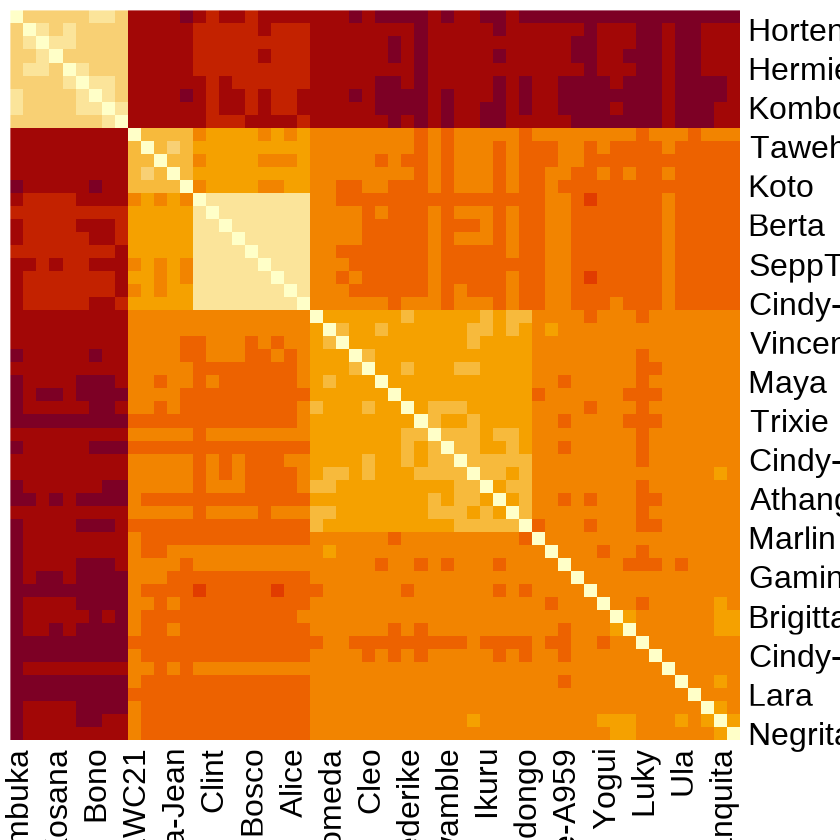

In [41]:
heatmap(x = div_mat, Rowv = NA, Colv = NA, revC = TRUE, symm = TRUE)

Combine the matrices with sequence divergence in the upper triangle and 3D divergence in the lower triangle.

In [42]:
combined_mat <- matrix(NA, nrow = 56, ncol = 56, dimnames = list(reordered_IDs, reordered_IDs))
combined_mat[upper.tri(combined_mat)] <- reordered_seq_mat[upper.tri(reordered_seq_mat)]
combined_mat[lower.tri(combined_mat)] <- div_mat[lower.tri(div_mat)]

Plot.

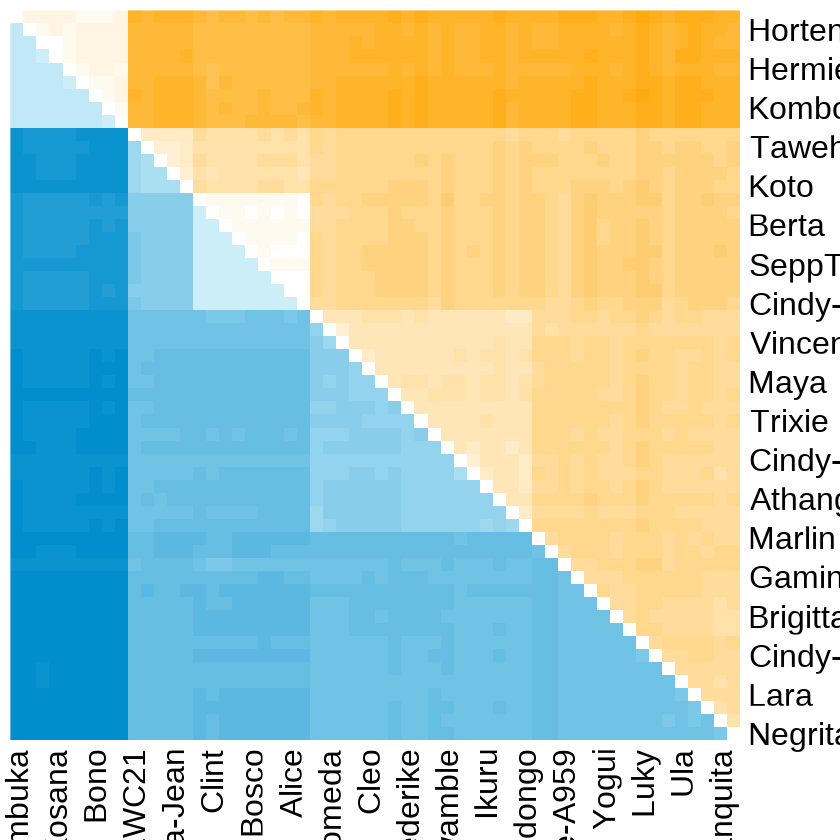

In [43]:
color_breaks = c(seq(0.002,0.013,length=19), seq(784,4264,length=20))
seq_palette <- colorRampPalette(c('#CCEEF9','#008ECE'))(n = 19)
div_palette <- colorRampPalette(c('white','orange'))(n = 19)
col_palette <- c(div_palette,seq_palette)
heatmap(x = combined_mat, keep.dendro = FALSE, Rowv = NA, symm=TRUE, col = col_palette, breaks = color_breaks)

In [44]:
pdf('suppl_figs/combined_heatmap.pdf', height = 15, width = 15)
heatmap(x = combined_mat, Rowv = NA, symm=TRUE, col = col_palette, breaks = color_breaks) # does not save as an object so we just call the command again
dev.off()

png 
  2

## Local 3D vs Sequence Divergence <a class = 'anchor' id = 'local3dvssequencedivergence'></a>

Plotting 6 million points takes a second. 

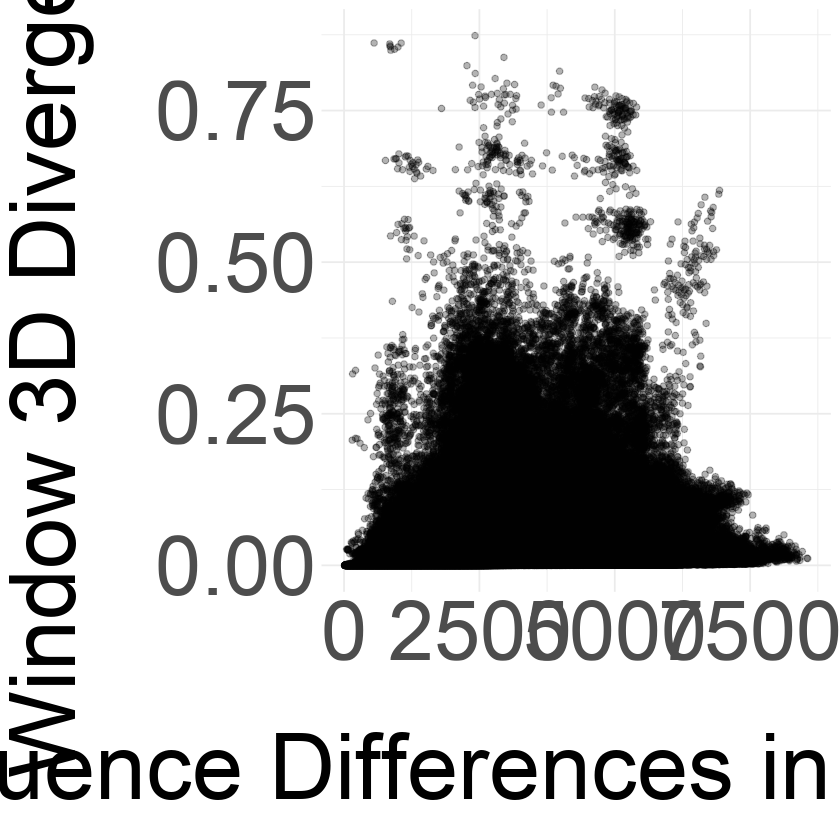

In [43]:
diff_seq_diff_correlation <- ggplot(comparisons, aes(x = seq_diff, y = divergence)) + geom_point(alpha = 0.3) +
xlab('\nN Sequence Differences in 1 Mb Window') + ylab('Window 3D Divergence\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

diff_seq_diff_correlation

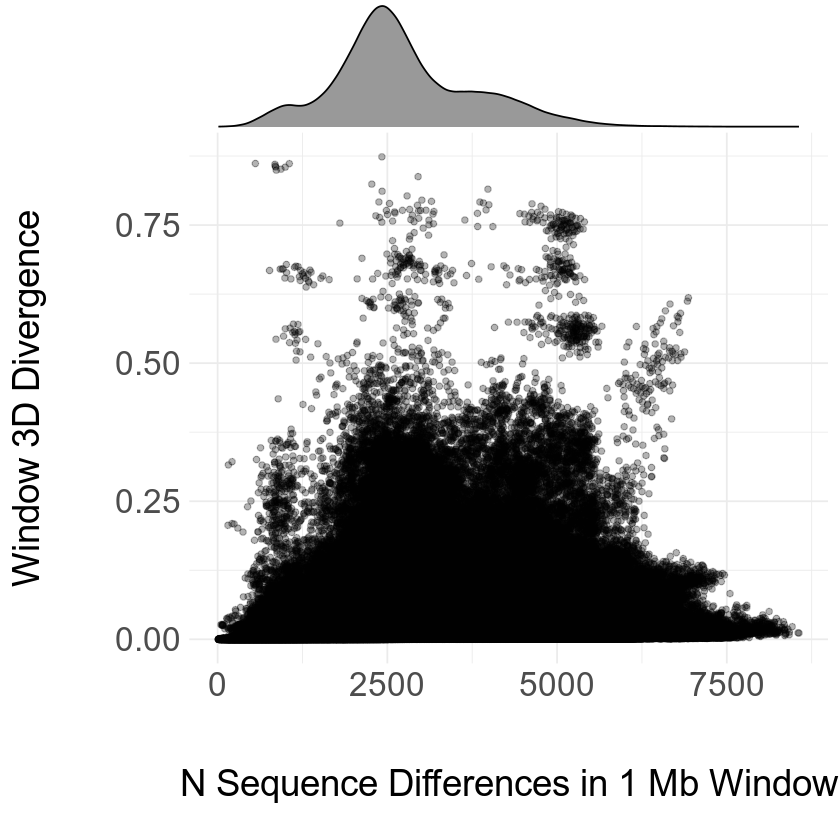

In [44]:
diff_seq_diff_correlation_with_density <- ggMarginal(diff_seq_diff_correlation, margins = 'x', color = 'black', fill = 'black', alpha = 0.4, size = 4)
diff_seq_diff_correlation_with_density

In [45]:
png('suppl_figs/diff_seq_diff_correlation.png', height = 12, width = 12, units = 'in', res = 300)
print(diff_seq_diff_correlation_with_density)
dev.off()

png 
  2

Let's relabel the dataframe to pare down the dyad types. I want to concatenate comparisons among different chimpanzee lineages.

In [46]:
comparisons_simple_dyad = comparisons

In [47]:
comparisons_simple_dyad$dyad_type <- str_replace_all(comparisons_simple_dyad$dyad_type, c('pte-pts'='pt-pt', 'pte-ptt'='pt-pt', 'pte-ptv'='pt-pt', 'pts-ptt'='pt-pt', 'pts-ptv'='pt-pt', 'ptt-ptv'='pt-pt'))

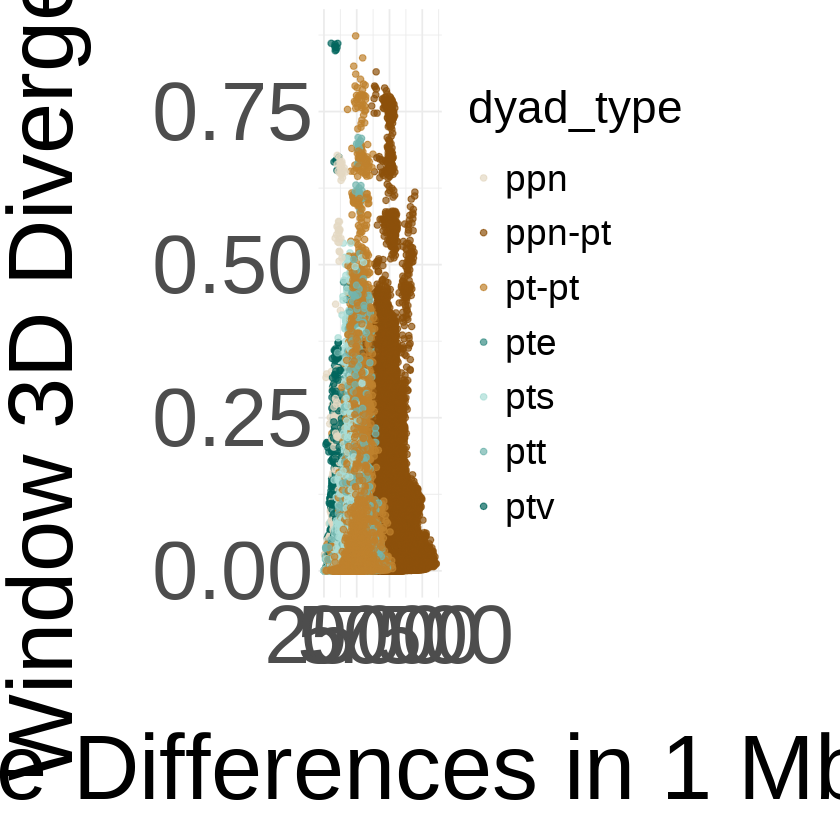

In [48]:
diff_seq_diff_correlation_by_dyad <- ggplot(comparisons_simple_dyad, aes(x = seq_diff, y = divergence, color = dyad_type)) + geom_point(alpha = 0.7) +
xlab('\nN Sequence Differences in 1 Mb Window') + ylab('Window 3D Divergence\n') +
scale_color_manual(values = c(ppn_color, ppn_pt_color, pt_pt_color, pte_color, pts_color, ptt_color, ptv_color)) + 
theme_minimal() + #theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

diff_seq_diff_correlation_by_dyad

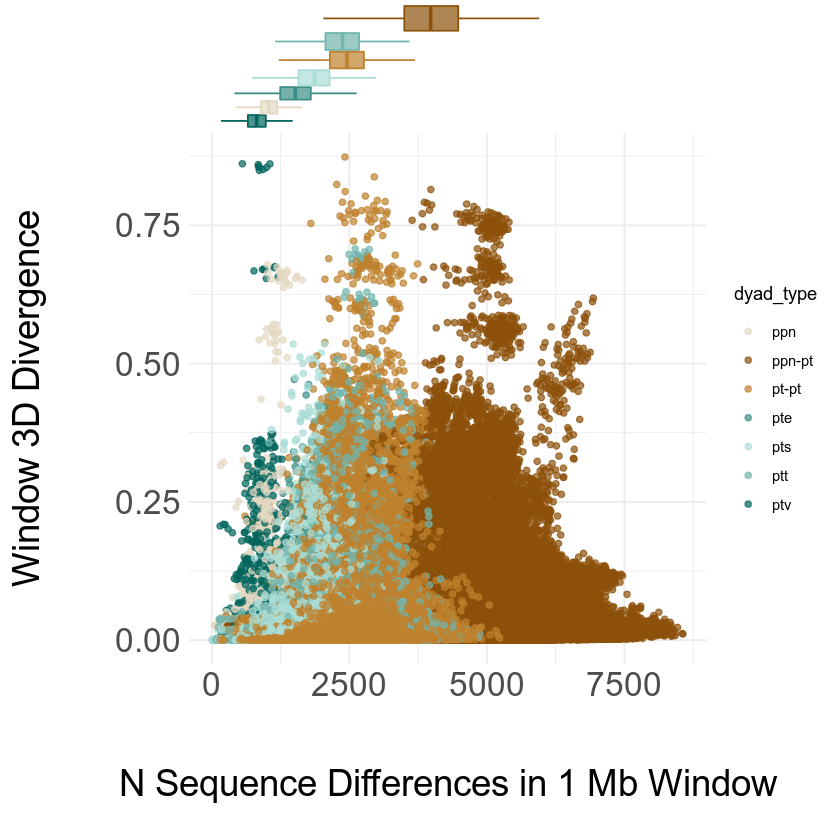

In [49]:
diff_seq_diff_correlation_by_dyad_with_density <- ggMarginal(diff_seq_diff_correlation_by_dyad, type="boxplot", margins = 'x', groupColour = TRUE, groupFill = TRUE, alpha = 0.7, size = 4, outlier.shape = NA)
diff_seq_diff_correlation_by_dyad_with_density

In [50]:
png('suppl_figs/diff_seq_diff_correlation_by_dyad.png', height = 12, width = 12, units = 'in', res = 300)
diff_seq_diff_correlation_by_dyad_with_density
dev.off()

png 
  2

## Bonobo - Chimp Ideogram

In [9]:
chrs = read.csv('../data/metadata/panTro6_chr_lengths.txt', sep = '\t', header = FALSE)
names(chrs) <- c('chr','length')
chrs$chr <- factor(chrs$chr, levels = c('chr1','chr2A','chr2B','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX'))
head(chrs)

chr   length   
1 chr1  224244399
2 chr2A 108022953
3 chr2B 128755405
4 chr3  196562556
5 chr4  189151597
6 chr5  159319378

In [10]:
excluded_windows = read.csv('../data/metadata/panTro6_excluded_windows.bed', sep = '\t', header = FALSE)
names(excluded_windows) <- c('chr','start','end')
excluded_windows$chr <- as.factor(excluded_windows$chr)

In [11]:
divergent_windows = read.csv('../data/divergent_windows/ppn_pt_divergent_windows.bed', sep = '\t', header = FALSE)
names(divergent_windows) <- c('chr','start','end')
divergent_windows$chr <- as.factor(divergent_windows$chr)

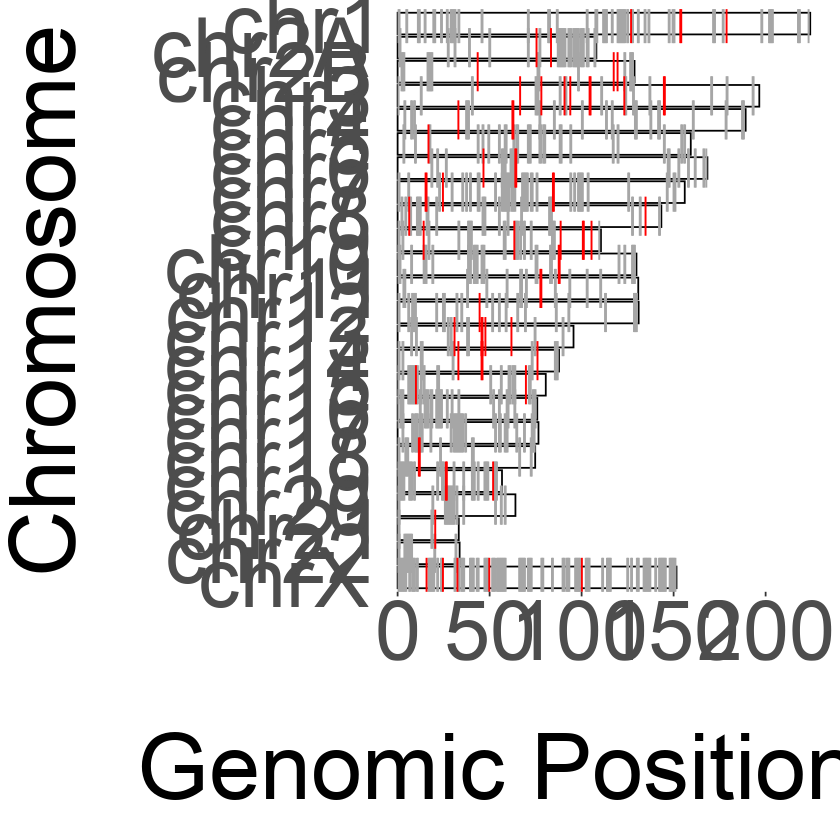

In [20]:
divergent_windows_ideogram = ggplot() + geom_col(data = chrs, aes(x = chr, y = length), fill = 'white', color = 'black') +
    coord_flip() + scale_x_discrete(limits = rev(levels(chrs$chr))) + scale_y_continuous(labels=c(0,50,100,150,200), breaks = c(0,50000000,100000000,150000000,200000000)) +
    geom_rect(data = excluded_windows, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = 'grey65', alpha = 0.3, size = 11) +
    geom_rect(data = divergent_windows, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = 'red', alpha = 0.3, size = 11) +
    xlab('Chromosome\n') + ylab ('\nGenomic Position (Mb)') +
    theme_classic() + theme(text = element_text(family = 'Arial')) + theme(axis.line = element_blank(), axis.ticks.y = element_blank()) +
    theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

divergent_windows_ideogram

In [21]:
#pdf('ppn_pt_divergent_windows_ideogram.pdf', height = 20, width = 16)
#divergent_windows_ideogram
#dev.off()

## Lineage Comparison Figure

This multiplot code is a little different because of the ideogram. 

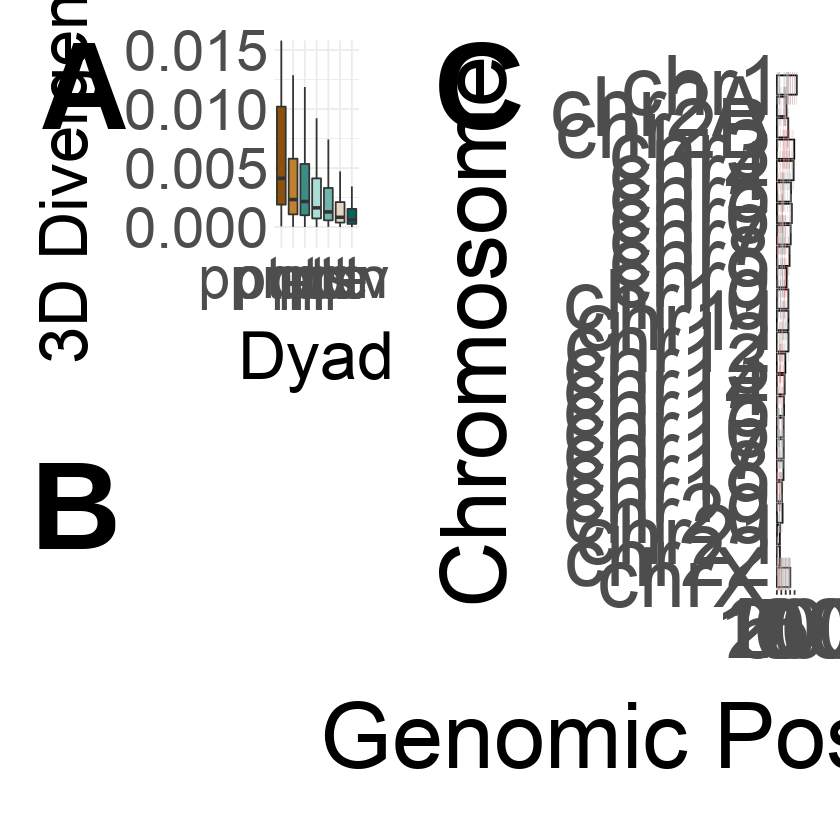

In [22]:
left_column <- plot_grid(dyad_boxplots_simple, NULL, labels = c('A', 'B'), label_size = 30, ncol = 1, scale = 0.85)
right_column <- plot_grid(divergent_windows_ideogram, labels = c('C'), label_size = 30, nrow = 1, scale = 0.85)
lineage_comparison_figure <- plot_grid(left_column, right_column, nrow = 1, rel_widths = c(0.45,0.5))
lineage_comparison_figure

In [23]:
pdf('lineage_comparison_figure.pdf', width = 15, height = 12)
lineage_comparison_figure
dev.off()

png 
  2

## Gene Expression <a class = 'anchor' id = 'geneexpression'></a>

In [24]:
gene_expression = read.csv('../data/divergent_windows/gene_expression_subset.txt', sep = '\t', header = TRUE)
head(gene_expression)

gene   tissue     ppn_female ppn_male ptr_female ptr_male ppn_mean ptr_mean
1 ADGRF1 kidney      498        305     1528       1141      401.5   1334.5  
2 ADGRF5 cerebellum  151        189       66         79      170.0     72.5  
3 ADGRF5 heart      1782       2381      645       1873     2081.5   1259.0  
4 ADGRF5 kidney     1328        974     1952       2079     1151.0   2015.5  
5 ADGRF5 liver       439        427      154        323      433.0    238.5  
6 ADORA1 cerebellum  292        675      470        295      483.5    382.5  
  fold_change
1  1.7328274 
2 -1.2294818 
3 -0.7253453 
4  0.8082499 
5 -0.8603778 
6 -0.3380561

In [25]:
gene_expression_others = read.csv('../data/divergent_windows/gene_expression_others.txt', sep = '\t', header = TRUE)
head(gene_expression_others)

gene tissue     ppn_female ppn_male ptr_female ptr_male ppn_mean ptr_mean
1 A1BG cerebellum    77       106        33         60       91.5     46.5 
2 A1BG heart         10        13         1          2       11.5      1.5 
3 A1BG kidney        71        41         4         47       56.0     25.5 
4 A1BG liver      20096      7430     14688      26935    13763.0  20811.5 
5 A1CF kidney        97       141       208        643      119.0    425.5 
6 A1CF liver       1493       922       512       1287     1207.5    899.5 
  fold_change
1 -0.976541  
2 -2.938599  
3 -1.134930  
4  0.596586  
5  1.838198  
6 -0.424828

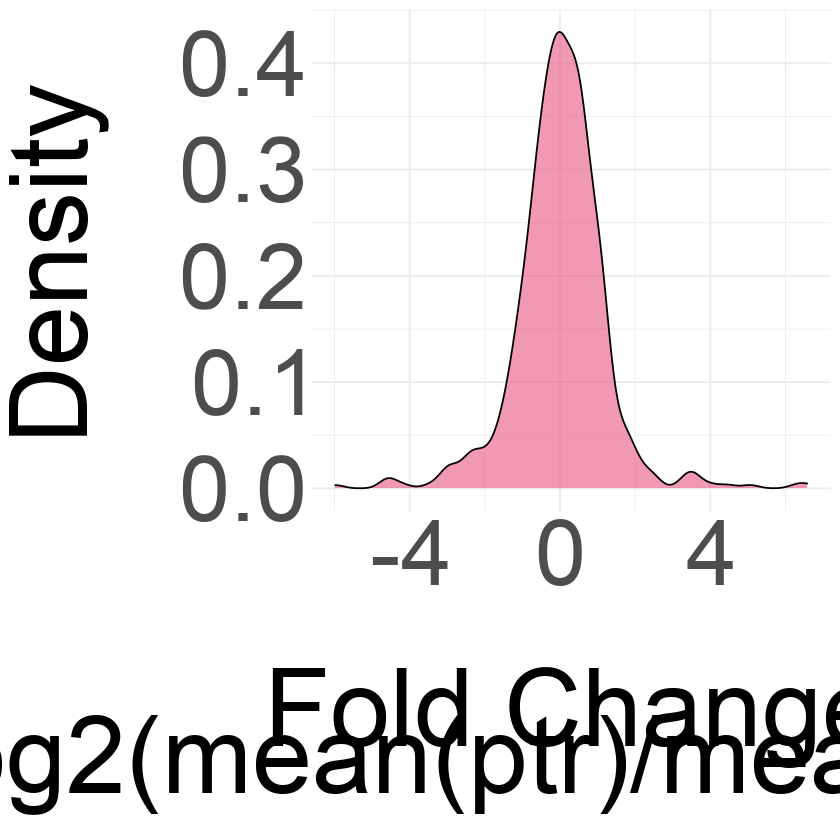

In [33]:
genes_in_divergent_windows_gene_expression_plot <- ggplot(gene_expression, aes(fold_change)) + geom_density(fill = '#e75480', alpha = 0.6) + 
xlab('\nFold Change\n(log2(mean(ptr)/mean(ppn)))') + ylab('Density\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 26), axis.text.x = element_text(size = 22), axis.text.y = element_text(size = 22))

genes_in_divergent_windows_gene_expression_plot

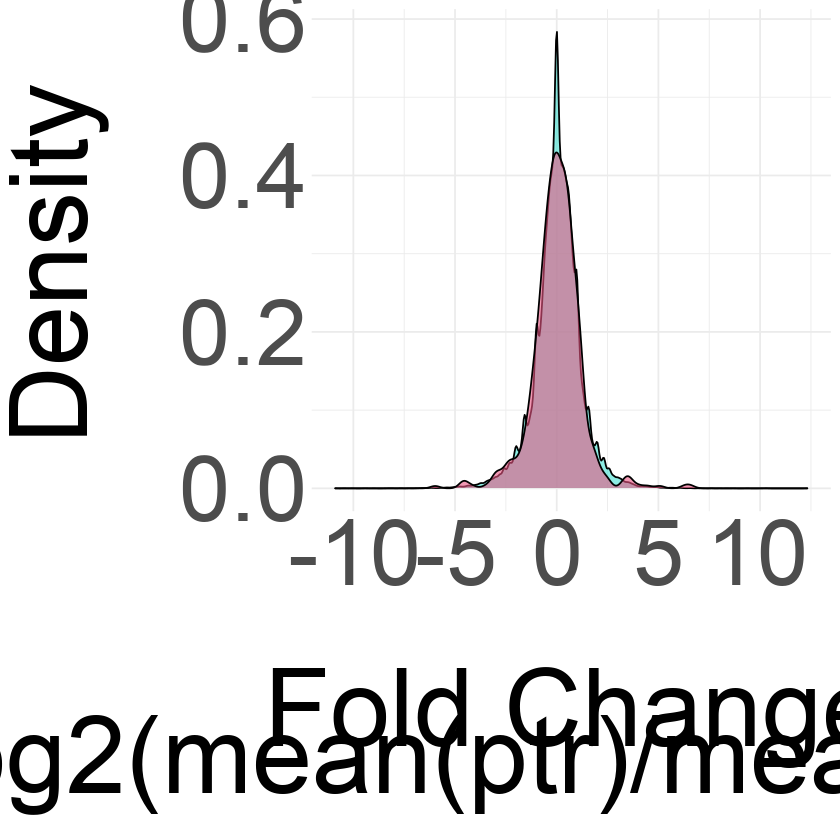

In [34]:
other_genes_gene_expression_plot <- ggplot(gene_expression_others, aes(fold_change)) +
geom_density(fill = '#40E0D0', alpha = 0.6) +
geom_density(data = gene_expression, fill = '#e75480', alpha = 0.6) + 
xlab('\nFold Change\n(log2(mean(ptr)/mean(ppn)))') + ylab('Density\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 26), axis.text.x = element_text(size = 22), axis.text.y = element_text(size = 22))

other_genes_gene_expression_plot

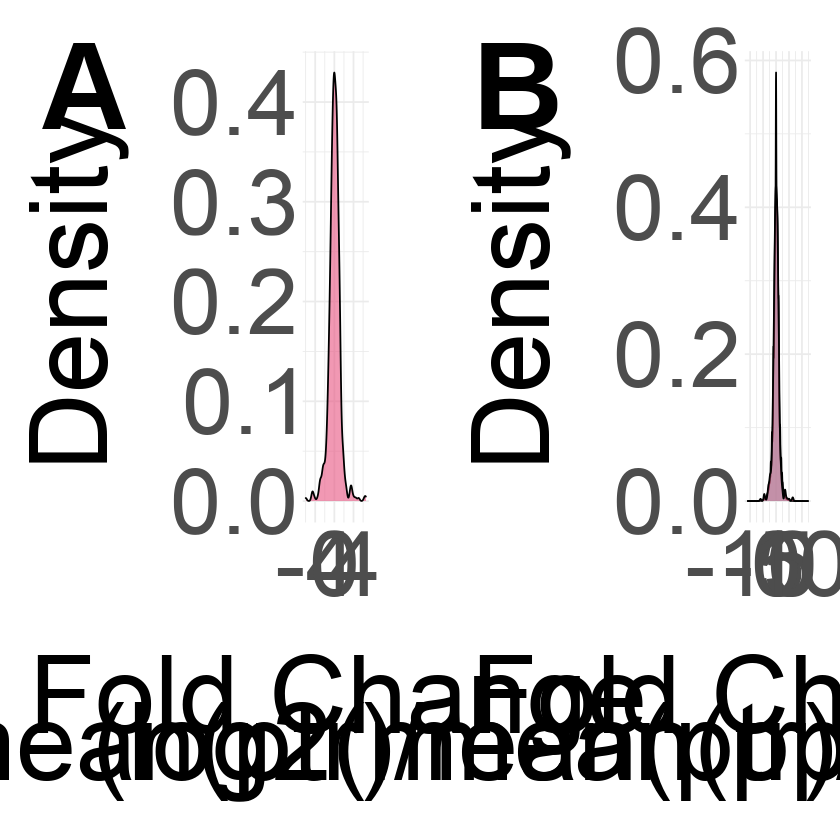

In [35]:
gene_expression_plot <- plot_grid(genes_in_divergent_windows_gene_expression_plot, NULL, other_genes_gene_expression_plot, labels = c('A','','B'), label_size = 30, nrow = 1, rel_widths = c(0.45,0.05,0.45), scale = 0.9)
gene_expression_plot

In [36]:
pdf('suppl_figs/gene_expression_plot.pdf', width = 24, height = 12)
gene_expression_plot
dev.off()

png 
  2

In [13]:
chromosome = c('chr21')
length = c(33232379)
chr21_length = data.frame(chromosome,length)

chromosome = c('chr21')
window_number = c('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64')
window_inclusion = c('n','n','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','n','n','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','n','n')
window_length = c(524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,202235)
chr21_windows = data.frame(chromosome,window_number,window_inclusion,window_length)
chr21_windows$window_length = chr21_windows$window_length/1000000
chr21_windows$window_number <- as.numeric(chr21_windows$window_number)

In [14]:
head(chr21_windows)

chromosome window_number window_inclusion window_length
1 chr21      1             n                0.524288     
2 chr21      2             n                0.524288     
3 chr21      3             y                0.524288     
4 chr21      4             y                0.524288     
5 chr21      5             y                0.524288     
6 chr21      6             y                0.524288

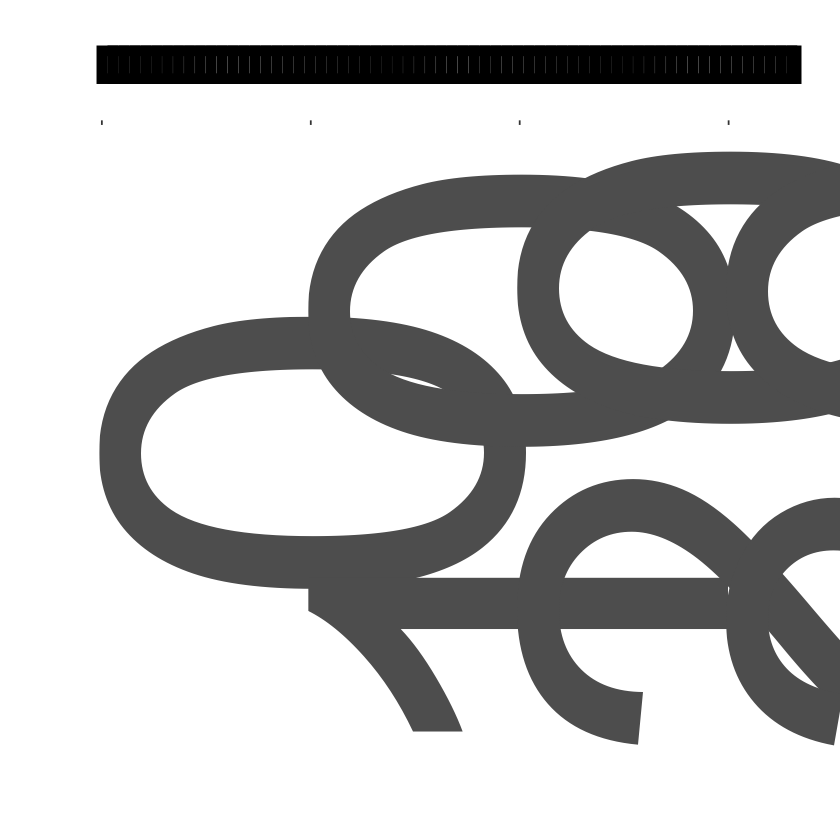

In [15]:
chr21_windows_plot <- ggplot(data = chr21_windows, aes(chromosome, window_length, group = rev(window_number), fill = window_inclusion)) + geom_col(color = 'black', width = 0.3, size = 3) +
scale_fill_manual(values = c('grey65','white')) +
coord_flip() + xlab('') + ylab('') + theme_classic() + theme(text = element_text(family = 'Arial')) + theme(axis.line = element_blank(), axis.ticks.y = element_blank()) +
theme(axis.text.x = element_text(size = 140, angle = 90), axis.text.y = element_blank()) +
theme(legend.position = 'none')

chr21_windows_plot

In [16]:
pdf('suppl_figs/chr21_windows.pdf', width = 130, height = 15)
chr21_windows_plot
dev.off()

png 
  2

## Reference Predictions by Cell Type

In [13]:
#reference_comparisons = read.csv('../data/dataframes/reference_cell_type_comparisons.txt', sep = '\t', header = TRUE)
#head(reference_comparisons)

cell_type_1 cell_type_2 chr   window_start window        mse        
1 GM12878     H1ESC       chr10 1572864      chr10_1572864 0.004235280
2 GM12878     H1ESC       chr10 2097152      chr10_2097152 0.004803233
3 GM12878     H1ESC       chr10 2621440      chr10_2621440 0.011545737
4 GM12878     H1ESC       chr10 3145728      chr10_3145728 0.010323423
5 GM12878     H1ESC       chr10 3670016      chr10_3670016 0.005836600
6 GM12878     H1ESC       chr10 4194304      chr10_4194304 0.045897650
  spearman 
1 0.8433662
2 0.9042703
3 0.9842423
4 0.9684205
5 0.9260935
6 0.9719512

In [14]:
#reference_comparisons$cell_type_dyad <- paste(' ', reference_comparisons$cell_type_1, '\n', reference_comparisons$cell_type_2)
#head(reference_comparisons)

cell_type_1 cell_type_2 chr   window_start window        mse        
1 GM12878     H1ESC       chr10 1572864      chr10_1572864 0.004235280
2 GM12878     H1ESC       chr10 2097152      chr10_2097152 0.004803233
3 GM12878     H1ESC       chr10 2621440      chr10_2621440 0.011545737
4 GM12878     H1ESC       chr10 3145728      chr10_3145728 0.010323423
5 GM12878     H1ESC       chr10 3670016      chr10_3670016 0.005836600
6 GM12878     H1ESC       chr10 4194304      chr10_4194304 0.045897650
  spearman  cell_type_dyad    
1 0.8433662   GM12878 \n H1ESC
2 0.9042703   GM12878 \n H1ESC
3 0.9842423   GM12878 \n H1ESC
4 0.9684205   GM12878 \n H1ESC
5 0.9260935   GM12878 \n H1ESC
6 0.9719512   GM12878 \n H1ESC

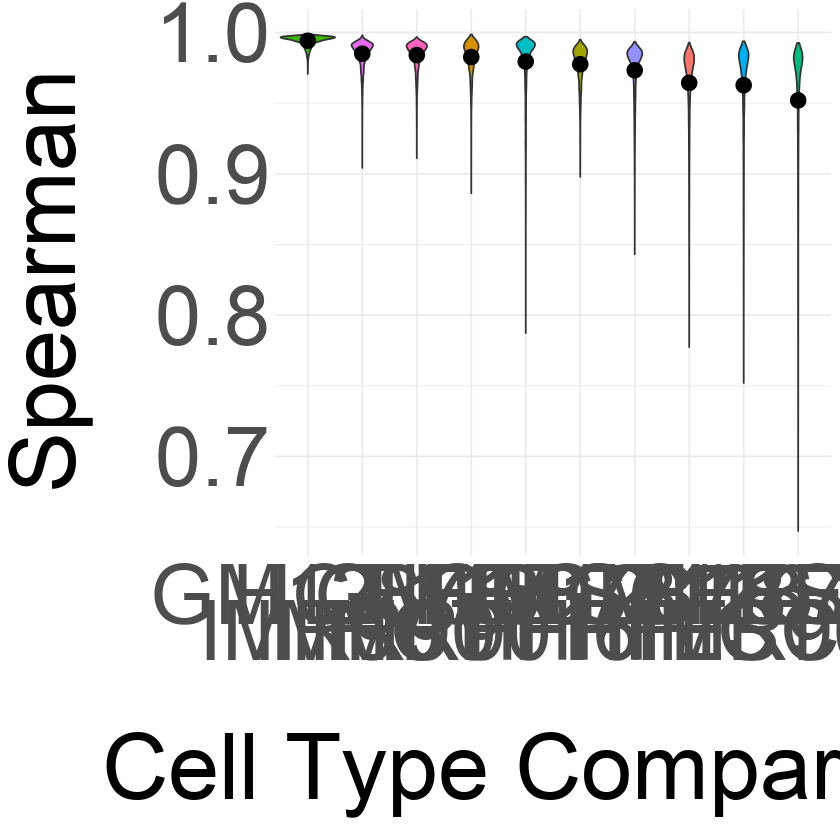

In [15]:
#reference_comparisons_plot <- ggplot(data = reference_comparisons) + geom_violin(aes(x = reorder(cell_type_dyad, -spearman), y = spearman, fill = factor(cell_type_dyad)), width = 1) + 
#stat_summary(aes(x = cell_type_dyad, y = spearman), geom = 'point', fun = 'mean', size = 4) +
#xlab('\nCell Type Comparison') + ylab('Spearman\n') +
#theme_minimal() + theme(text = element_text(family = 'Arial')) +
#theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) +
#theme(legend.position = 'none')

#reference_comparisons_plot

In [13]:
#pdf('suppl_figs/reference_comparisons_plot.pdf', height = 12, width = 18)
#reference_comparisons_plot
#dev.off()

png 
  2

## Sample Predictions by Cell Type

In [14]:
#cell_type_correlation = read.csv('../data/dataframes/cell_type_correlation.txt', sep = '\t', header = TRUE)
#head(cell_type_correlation)

ind1        ind2   window        cell_type_x divergence_x cell_type_y
1 Akwaya-Jean Alfred chr10_1572864 HFF         0.012344984  GM12878    
2 Akwaya-Jean Alfred chr10_2097152 HFF         0.030190797  GM12878    
3 Akwaya-Jean Alfred chr10_2621440 HFF         0.003601548  GM12878    
4 Akwaya-Jean Alfred chr10_3145728 HFF         0.002100716  GM12878    
5 Akwaya-Jean Alfred chr10_3670016 HFF         0.003268396  GM12878    
6 Akwaya-Jean Alfred chr10_4194304 HFF         0.002412069  GM12878    
  divergence_y
1 0.014475934 
2 0.033940752 
3 0.002945260 
4 0.001484640 
5 0.002719372 
6 0.002056229

In [15]:
#cell_type_correlation_plot <- ggplot(cell_type_correlation, aes(x = divergence_x, y = divergence_y)) + geom_point(alpha = 0.3) +
#xlab('\nHFF 3D Divergence') + ylab('GM12878 3D Divergence\n') +
#theme_minimal() + theme(text = element_text(family = 'Arial')) +
#theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

#cell_type_correlation_plot

In [16]:
#png('suppl_figs/cell_type_correlation_plot.png', height = 12, width = 12, units = 'in', res = 300)
#cell_type_correlation_plot
#dev.off()

png 
  2

In [18]:
phenotype_enrichment_plot <- function(path, stricter_p_value_threshold, strict_p_value_threshold, plot_title) {
    
    enrichment_data <- read.csv(path, header = TRUE, sep = '\t')
    #systems_numbers = c('behavior'=1,'cardiovascular'=2,'digestive'=3,'endocrine'=4,'hematologic'=5,'immune'=6,'integumentary'=7,'lymphatic'=8,'metabolic'=9,'nervous'=10,'reproductive'=11,'respiratory'=12,'skeletal'=13,'skeletal muscle'=14,'urinary'=15,'other'=16)
    #enrichment_data$system <- factor(enrichment_data$system, levels = c('behavior','cardiovascular','digestive','endocrine','hematologic','immune','integumentary','lymphatic','metabolic','nervous','reproductive','respiratory','skeletal','skeletal muscle','urinary','other'))
    #enrichment_data$x_coordinate = systems_numbers[enrichment_data$system] + (log2(enrichment_data$enrichment)/4)
    
    ggplot(enrichment_data, aes(x = log2(enrichment), y = -log10(p_value))) + geom_point(alpha = 0.5, aes(size = enrichment)) +
    geom_hline(yintercept = -log10(stricter_p_value_threshold), linetype='dotted', color = 'black') +
    geom_hline(yintercept = -log10(strict_p_value_threshold), linetype='dashed', color = 'black') +
    geom_vline(xintercept = 1, linetype = 'solid', color = 'black') +
    #scale_x_continuous(breaks=1:16, labels = c('behavior','cardiovascular','digestive','endocrine','hematologic','immune','integumentary','lymphatic','metabolic','nervous','reproductive','respiratory','skeletal','skeletal muscle','urinary','other')) +
    ggtitle(plot_title) + xlab('\nlog2(Enrichment)') + ylab('-log10(P)\n') + 
    theme_minimal() + theme(text = element_text(family = 'Arial')) + theme(plot.title = element_text(size = 18, hjust = 0.5)) +
    theme(axis.title = element_text(size = 18), axis.text.x = element_text(size = 16, angle = 45, hjust = 1), axis.text.y = element_text(size = 16)) +
    theme(legend.position = 'none')
}

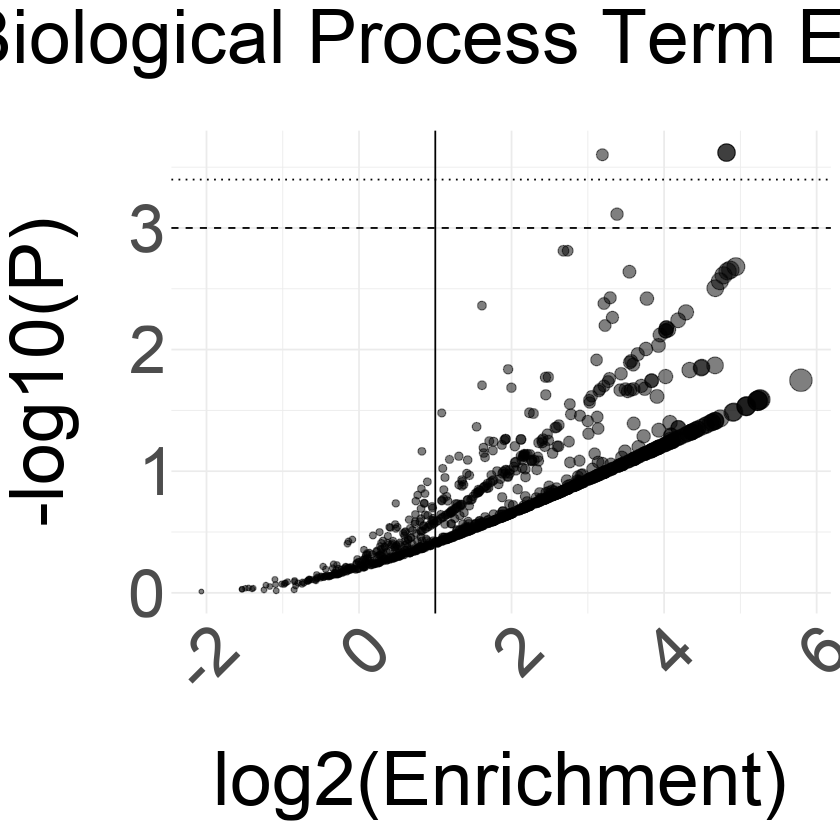

In [19]:
divergent_genes_BP_plot <- phenotype_enrichment_plot('../data/phenotype_enrichment/enrichment/ppn_pt_BP_enrichment.txt', 0.0004, 0.001, 'GO Biological Process Term Enrichment\n')
divergent_genes_BP_plot

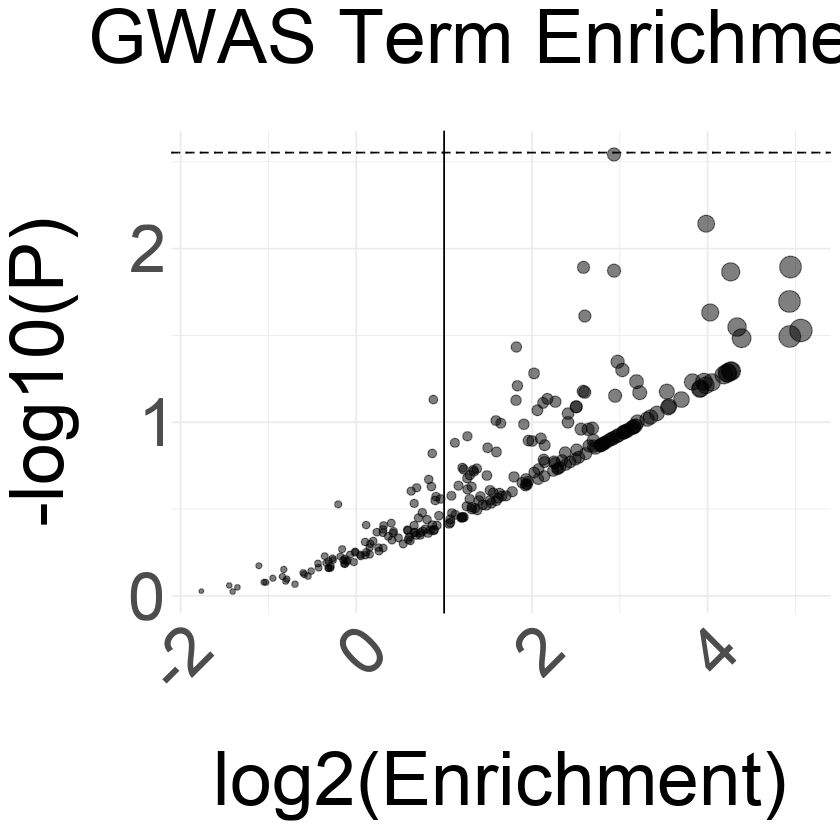

In [20]:
divergent_genes_GWAS_plot <- phenotype_enrichment_plot('../data/phenotype_enrichment/enrichment/ppn_pt_GWAS_enrichment.txt', 0.0028, 0.0028, 'GWAS Term Enrichment\n')
divergent_genes_GWAS_plot

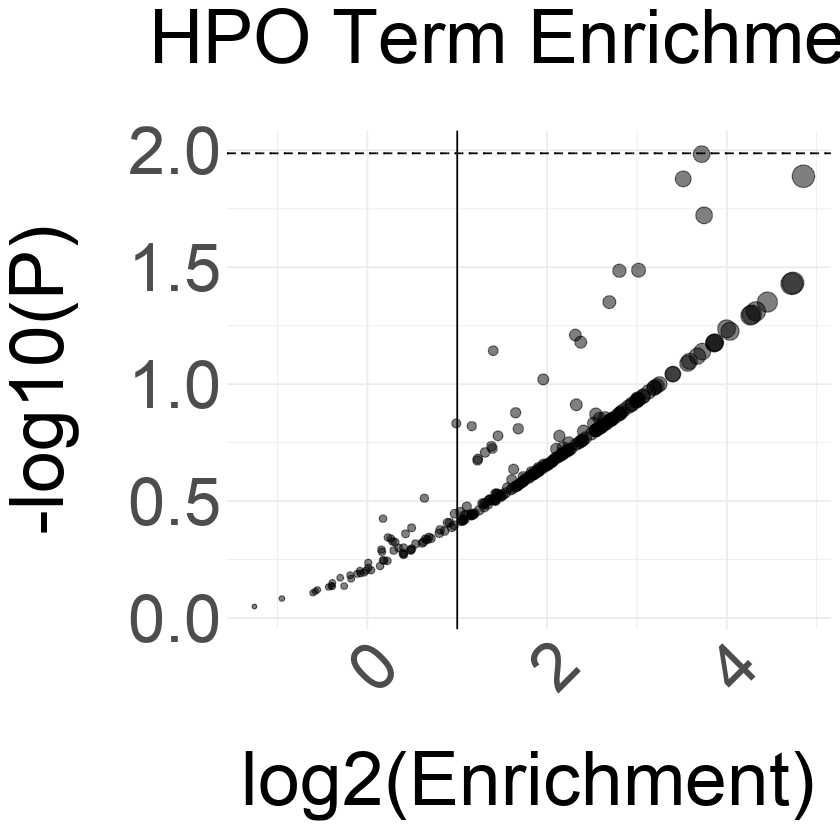

In [21]:
divergent_genes_HPO_plot <- phenotype_enrichment_plot('../data/phenotype_enrichment/enrichment/ppn_pt_HPO_enrichment.txt', 0.0103, 0.0103, 'HPO Term Enrichment\n')
divergent_genes_HPO_plot

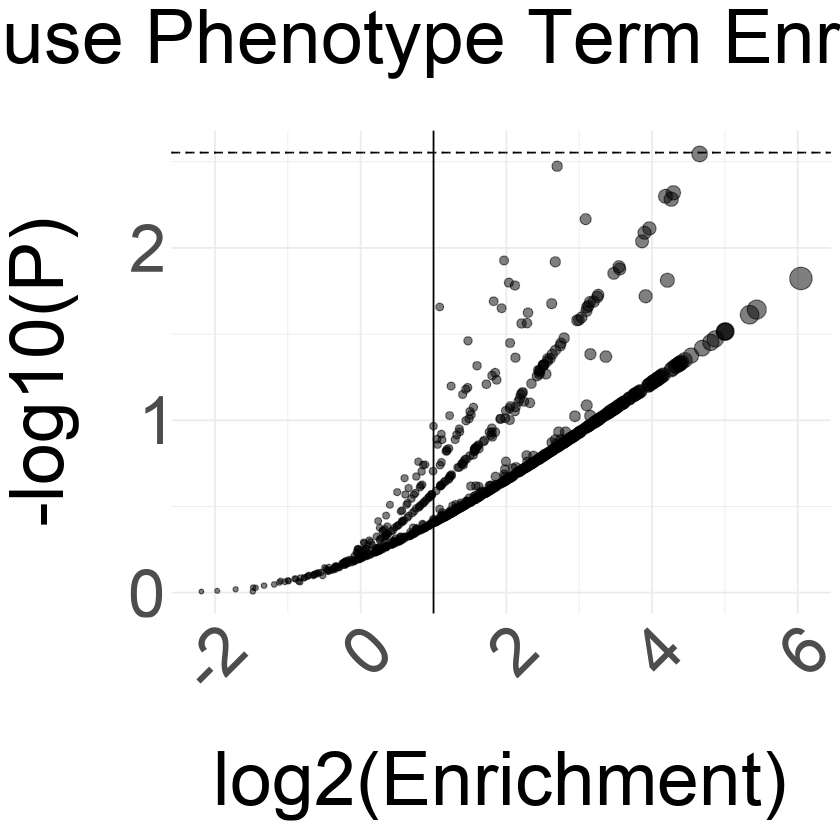

In [22]:
divergent_genes_MP_plot <- phenotype_enrichment_plot('../data/phenotype_enrichment/enrichment/ppn_pt_MP_enrichment.txt', 0.0028, 0.0028, 'Mouse Phenotype Term Enrichment\n')
divergent_genes_MP_plot

In [34]:
#top_row <- plot_grid(divergent_genes_BP_plot, NULL, divergent_genes_GWAS_plot, labels = c('A','','B'), label_size = 30, rel_widths = c(0.45,0.05,0.45), nrow = 1, scale = 0.9)
#middle_row <- plot_grid(NULL, labels = c('',''), label_size = 30, nrow = 1, scale = 0.9)
#bottom_row <- plot_grid(divergent_genes_HPO_plot, NULL, divergent_genes_MP_plot, labels = c('C','','D'), label_size = 30, rel_widths = c(0.45,0.05,0.45), nrow = 1, scale = 0.9)

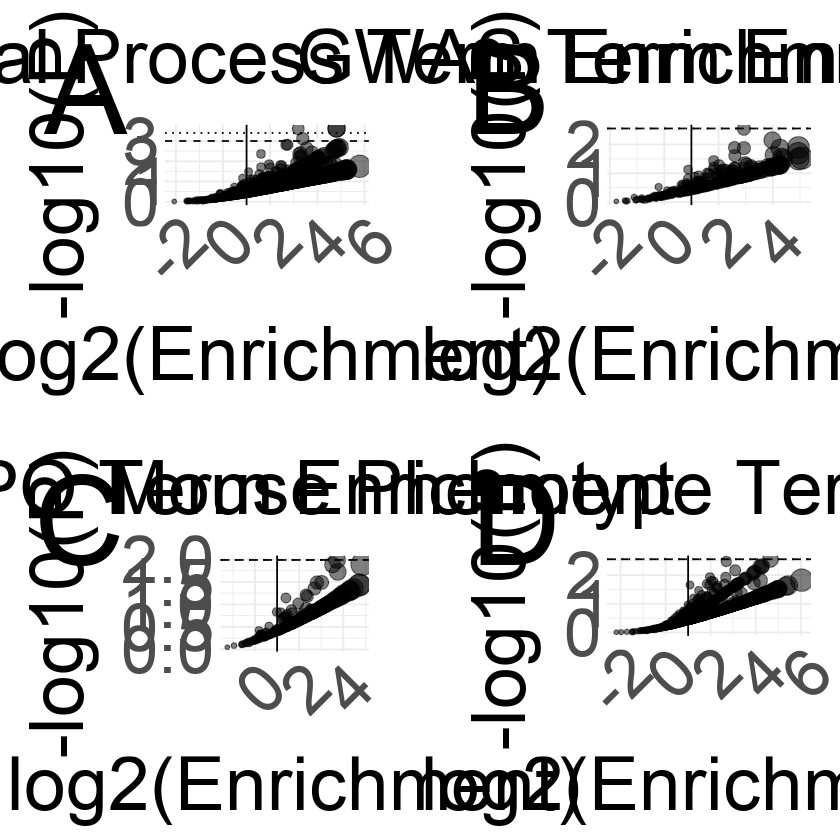

In [35]:
#theme_set(theme_cowplot(font_family = 'Arial'))
#divergent_genes_enrichment_plot <- plot_grid(top_row, middle_row, bottom_row, rel_heights = c(0.475,0.025,0.475), ncol = 1)
#divergent_genes_enrichment_plot

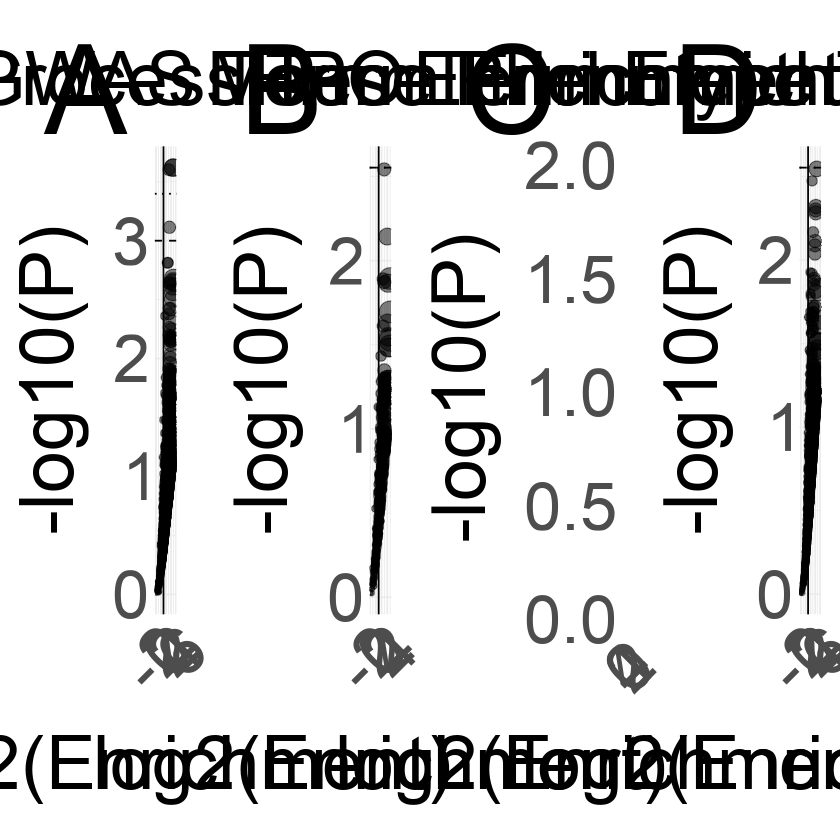

In [37]:
divergent_genes_enrichment_plot <- plot_grid(divergent_genes_BP_plot, NULL, divergent_genes_GWAS_plot, NULL, divergent_genes_HPO_plot, NULL, divergent_genes_MP_plot, labels = c('A','','B','','C','','D'), label_size = 30, rel_widths = c(0.5,0.05,0.5,0.05,0.5,0.05,0.5), nrow = 1, scale = 0.9)
divergent_genes_enrichment_plot

In [40]:
pdf('suppl_figs/divergent_genes_enrichment_plot.pdf', width = 24, height = 8)
divergent_genes_enrichment_plot
dev.off()

png 
  2